## Question 1

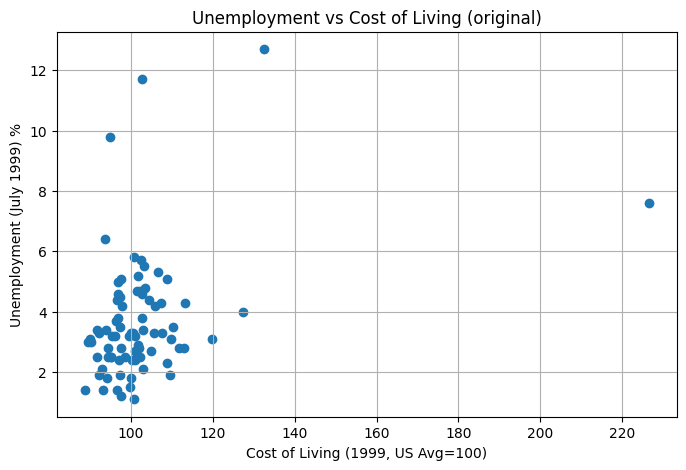

Detected most extreme outlier (by standardized distance):
New York
      NY
   226.5
     7.6


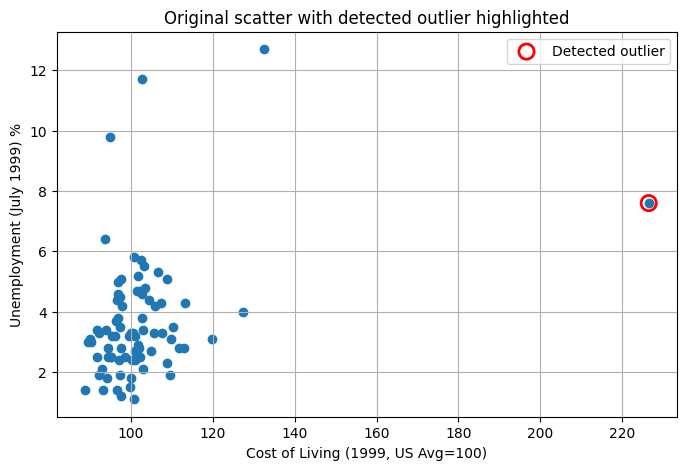


Trendline after removing single most extreme outlier:
  Unemployment = -5.1552 + (0.0869) * Cost_of_Living
  R-squared = 0.1159


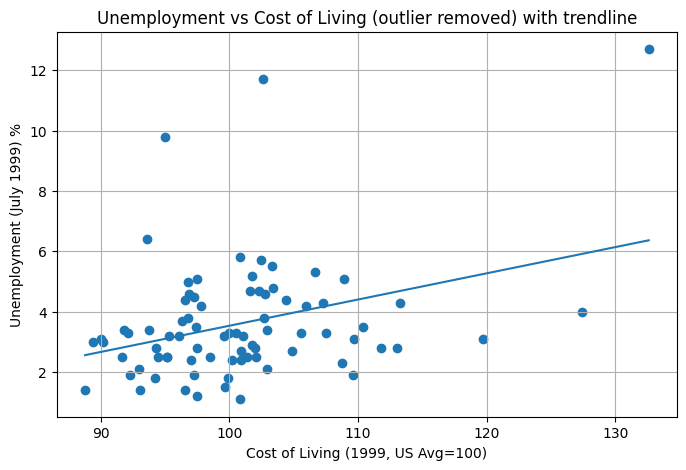


Conclusion: R-squared = 0.1159 → weak linear relationship (after removing the single most extreme outlier).


In [25]:
# col_unemp_analysis.py
# Analyze relationship between Cost of Living and Unemployment, detect one outlier,
# remove it, fit trendline and report equation + R^2. Produces two plots.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import statsmodels.api as sm

DATA = """
Metropolitan Area\tState\tCost\tUnemp
Baltimore	MD	102.30	4.70%
Detroit	MI	113.00	2.80%
Grand Rapids	MI	102.10	2.50%
Lansing	MI	102.90	2.10%
Minneapolis‐St. Paul	MN	99.70	1.50%
Rochester	MN	97.50	1.20%
Columbia	MO	93.10	1.40%
Kansas City	MO	96.10	3.20%
Springfield	MO	94.50	2.50%
St. Louis	MO	97.40	3.50%
Jackson	MS	94.30	2.80%
Billings	MT	102.70	3.80%
Great Falls	MT	102.50	5.70%
Missoula	MT	101.80	5.20%
Asheville	NC	100.00	3.30%
Charlotte	NC	96.80	5.00%
Greensboro‐Winston‐Salem	NC	97.50	2.80%
Raleigh	NC	97.30	1.90%
Wilmington	NC	97.80	4.20%
Bismarck	ND	99.90	1.80%
Fargo	ND	100.80	1.10%
Lincoln	NE	88.80	1.40%
Omaha	NE	92.30	1.90%
Concord	NH	108.80	2.30%
Atlantic City	NJ	132.60	12.70%
Albuquerque	NM	102.80	4.60%
Las Vegas	NV	105.60	3.30%
Reno	NV	111.80	2.80%
Albany	NY	109.70	3.10%
Buffalo	NY	97.30	4.50%
New York	NY	226.50	7.60%
Rochester	NY	110.40	3.50%
Syracuse	NY	102.90	3.40%
Akron	OH	96.30	3.70%
Cincinnati	OH	101.10	3.20%
Cleveland	OH	106.00	4.20%
Columbus	OH	101.40	2.50%
Toledo	OH	96.90	4.60%
Oklahoma City	OK	90.20	3.00%
Tulsa	OK	89.40	3.00%
Eugene	OR	108.90	5.10%
Portfland	OR	107.30	4.30%
Salem	OR	103.30	5.50%
Allentown	PA	104.40	4.40%
Erie	PA	101.60	4.70%
Harrisburg	PA	104.90	2.70%
Philadelphia	PA	127.40	4.00%
Pittsburgh	PA	113.30	4.30%
Williamsport	PA	97.50	5.10%
Charleston	SC	95.20	2.50%
Columbia	SC	94.20	1.80%
Greenville	SC	95.20	2.50%
Rapid City	SO	100.20	2.40%
Souix Falls	SO	96.60	1.40%
Knoxville	TN	93.80	3.40%
Memphis	TN	95.30	3.20%
Nashville	TN	91.70	2.50%
Abilene	TX	91.80	3.40%
Amarillo	TX	90.00	3.10%
Austin	TX	100.90	2.40%
Corpus Christi	TX	93.60	6.40%
Dallas‐Fort Worth	TX	101.80	2.90%
El Paso	TX	95.00	9.80%
Houston	TX	96.80	3.80%
San Antonio	TX	99.60	3.20%
Waco	TX	92.10	3.30%
Salt Lake City	UT	100.90	2.70%
Norfolk	VA	100.50	3.30%
Richmond	VA	102.00	2.80%
Roanoke	VA	93.00	2.10%
Burlington	VT	109.60	1.90%
Olympia	WA	103.40	4.80%
Seattle	WA	119.70	3.10%
Spokane	WA	106.70	5.30%
Yakima	WA	102.60	11.70%
Green Bay	Wl	97.00	2.40%
La Crosse	WI	98.50	2.50%
Milwaukee	Wl	107.50	3.30%
Charleston	WV	96.60	4.40%
Huntington	WV	100.80	5.80%
"""

# Read and clean
df = pd.read_csv(StringIO(DATA), sep="\t")
df['Unemp'] = df['Unemp'].str.rstrip('%').astype(float)
df.rename(columns={'Cost':'Cost_of_Living','Unemp':'Unemployment','Metropolitan Area':'Metro'}, inplace=True)

# 1) Scatter plot (original)
plt.figure(figsize=(8,5))
plt.scatter(df['Cost_of_Living'], df['Unemployment'])
plt.xlabel('Cost of Living (1999, US Avg=100)')
plt.ylabel('Unemployment (July 1999) %')
plt.title('Unemployment vs Cost of Living (original)')
plt.grid(True)
plt.show()

# 2) Detect single most extreme outlier by standardized distance
X = df[['Cost_of_Living','Unemployment']].to_numpy()
means = X.mean(axis=0)
stds = X.std(axis=0, ddof=0)
Z = (X - means) / stds
dist = np.linalg.norm(Z, axis=1)
out_idx = int(np.argmax(dist))
outlier = df.iloc[out_idx]

print("Detected most extreme outlier (by standardized distance):")
print(outlier[['Metro','State','Cost_of_Living','Unemployment']].to_string(index=False))

# 3) Plot original with outlier highlighted
plt.figure(figsize=(8,5))
plt.scatter(df['Cost_of_Living'], df['Unemployment'])
plt.scatter([outlier['Cost_of_Living']], [outlier['Unemployment']], s=120, facecolors='none', edgecolors='red', linewidths=2, label='Detected outlier')
plt.xlabel('Cost of Living (1999, US Avg=100)')
plt.ylabel('Unemployment (July 1999) %')
plt.title('Original scatter with detected outlier highlighted')
plt.legend(); plt.grid(True)
plt.show()

# 4) Remove outlier and fit linear regression (trendline)
df_clean = df.drop(df.index[out_idx]).reset_index(drop=True)
Xc = sm.add_constant(df_clean['Cost_of_Living'])
model = sm.OLS(df_clean['Unemployment'], Xc).fit()
a = model.params['const']
b = model.params['Cost_of_Living']
r2 = model.rsquared

print("\nTrendline after removing single most extreme outlier:")
print(f"  Unemployment = {a:.4f} + ({b:.4f}) * Cost_of_Living")
print(f"  R-squared = {r2:.4f}")


# 5) Plot cleaned scatter with trendline
plt.figure(figsize=(8,5))
plt.scatter(df_clean['Cost_of_Living'], df_clean['Unemployment'])
x_vals = np.linspace(df_clean['Cost_of_Living'].min(), df_clean['Cost_of_Living'].max(), 200)
y_vals = a + b * x_vals
plt.plot(x_vals, y_vals)
plt.xlabel('Cost of Living (1999, US Avg=100)')
plt.ylabel('Unemployment (July 1999) %')
plt.title('Unemployment vs Cost of Living (outlier removed) with trendline')
plt.grid(True)
plt.show()

# 6) Basic conclusion rule-of-thumb
if r2 >= 0.7:
    strength = "strong"
elif r2 >= 0.4:
    strength = "moderate"
elif r2 >= 0.1:
    strength = "weak"
else:
    strength = "very weak or negligible"
print(f"\nConclusion: R-squared = {r2:.4f} → {strength} linear relationship (after removing the single most extreme outlier).")


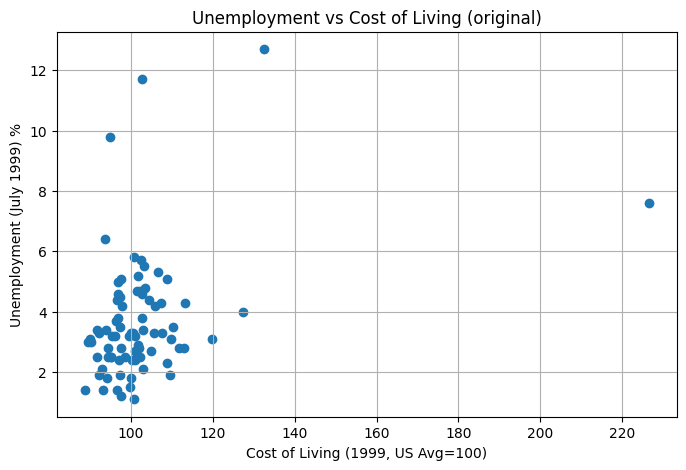

Detected most extreme outlier (by standardized distance):
New York
      NY
   226.5
     7.6


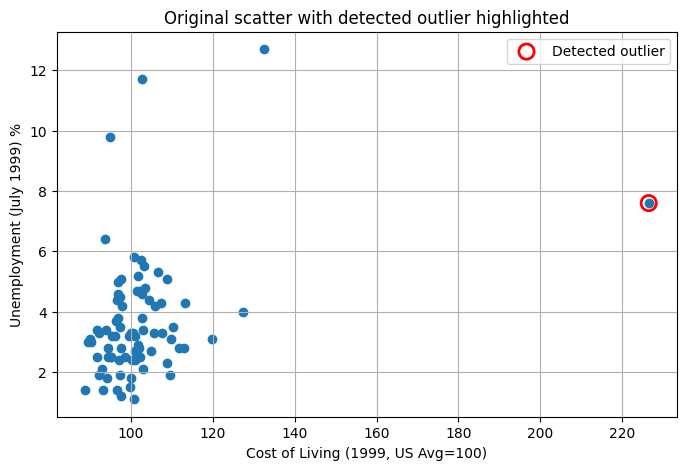


Trendline after removing single most extreme outlier (dependent = unemployment fraction):
  Unemployment_frac = -0.051552 + (0.000869) * Cost_of_Living
  R-squared = 0.115864

Rounded (your requested format):
  y = 0.0009x + (-0.0516)   where y is unemployment (fraction).


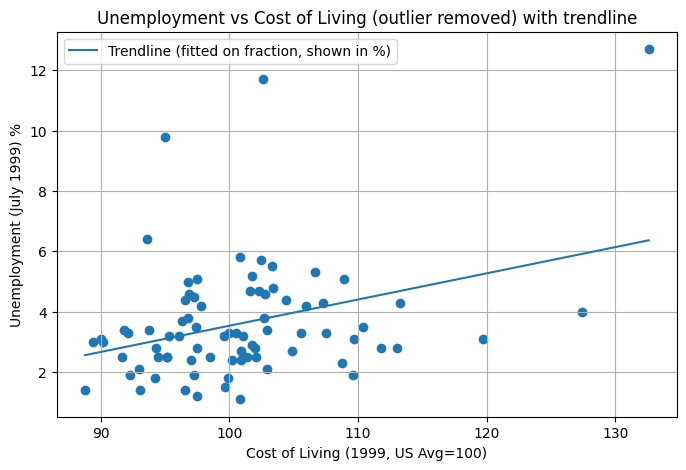


Conclusion: R-squared = 0.1159 → weak linear relationship (after removing the single most extreme outlier).


In [26]:
# col_unemp_analysis_fixed.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import statsmodels.api as sm

DATA = """
Metropolitan Area\tState\tCost\tUnemp
Baltimore	MD	102.30	4.70%
Detroit	MI	113.00	2.80%
Grand Rapids	MI	102.10	2.50%
Lansing	MI	102.90	2.10%
Minneapolis‐St. Paul	MN	99.70	1.50%
Rochester	MN	97.50	1.20%
Columbia	MO	93.10	1.40%
Kansas City	MO	96.10	3.20%
Springfield	MO	94.50	2.50%
St. Louis	MO	97.40	3.50%
Jackson	MS	94.30	2.80%
Billings	MT	102.70	3.80%
Great Falls	MT	102.50	5.70%
Missoula	MT	101.80	5.20%
Asheville	NC	100.00	3.30%
Charlotte	NC	96.80	5.00%
Greensboro‐Winston‐Salem	NC	97.50	2.80%
Raleigh	NC	97.30	1.90%
Wilmington	NC	97.80	4.20%
Bismarck	ND	99.90	1.80%
Fargo	ND	100.80	1.10%
Lincoln	NE	88.80	1.40%
Omaha	NE	92.30	1.90%
Concord	NH	108.80	2.30%
Atlantic City	NJ	132.60	12.70%
Albuquerque	NM	102.80	4.60%
Las Vegas	NV	105.60	3.30%
Reno	NV	111.80	2.80%
Albany	NY	109.70	3.10%
Buffalo	NY	97.30	4.50%
New York	NY	226.50	7.60%
Rochester	NY	110.40	3.50%
Syracuse	NY	102.90	3.40%
Akron	OH	96.30	3.70%
Cincinnati	OH	101.10	3.20%
Cleveland	OH	106.00	4.20%
Columbus	OH	101.40	2.50%
Toledo	OH	96.90	4.60%
Oklahoma City	OK	90.20	3.00%
Tulsa	OK	89.40	3.00%
Eugene	OR	108.90	5.10%
Portfland	OR	107.30	4.30%
Salem	OR	103.30	5.50%
Allentown	PA	104.40	4.40%
Erie	PA	101.60	4.70%
Harrisburg	PA	104.90	2.70%
Philadelphia	PA	127.40	4.00%
Pittsburgh	PA	113.30	4.30%
Williamsport	PA	97.50	5.10%
Charleston	SC	95.20	2.50%
Columbia	SC	94.20	1.80%
Greenville	SC	95.20	2.50%
Rapid City	SO	100.20	2.40%
Souix Falls	SO	96.60	1.40%
Knoxville	TN	93.80	3.40%
Memphis	TN	95.30	3.20%
Nashville	TN	91.70	2.50%
Abilene	TX	91.80	3.40%
Amarillo	TX	90.00	3.10%
Austin	TX	100.90	2.40%
Corpus Christi	TX	93.60	6.40%
Dallas‐Fort Worth	TX	101.80	2.90%
El Paso	TX	95.00	9.80%
Houston	TX	96.80	3.80%
San Antonio	TX	99.60	3.20%
Waco	TX	92.10	3.30%
Salt Lake City	UT	100.90	2.70%
Norfolk	VA	100.50	3.30%
Richmond	VA	102.00	2.80%
Roanoke	VA	93.00	2.10%
Burlington	VT	109.60	1.90%
Olympia	WA	103.40	4.80%
Seattle	WA	119.70	3.10%
Spokane	WA	106.70	5.30%
Yakima	WA	102.60	11.70%
Green Bay	Wl	97.00	2.40%
La Crosse	WI	98.50	2.50%
Milwaukee	Wl	107.50	3.30%
Charleston	WV	96.60	4.40%
Huntington	WV	100.80	5.80%
"""

# --- Read and clean (keep original percent column for plotting) ---
df = pd.read_csv(StringIO(DATA), sep="\t")
df['Unemployment'] = df['Unemp'].str.rstrip('%').astype(float)     # percent (e.g. 4.7)
# create fraction version for regression (e.g. 0.047)
df['Unemployment_frac'] = df['Unemployment'] / 100.0
df.rename(columns={'Cost':'Cost_of_Living','Metropolitan Area':'Metro'}, inplace=True)

# 1) Scatter plot (original, using percent for readability)
plt.figure(figsize=(8,5))
plt.scatter(df['Cost_of_Living'], df['Unemployment'])
plt.xlabel('Cost of Living (1999, US Avg=100)')
plt.ylabel('Unemployment (July 1999) %')
plt.title('Unemployment vs Cost of Living (original)')
plt.grid(True)
plt.show()

# 2) Detect single most extreme outlier by standardized distance
# Use the two columns (Cost_of_Living, Unemployment_frac) for detection (scaling to proportion doesn't change which is extreme)
X = df[['Cost_of_Living','Unemployment_frac']].to_numpy()
means = X.mean(axis=0)
stds = X.std(axis=0, ddof=0)
Z = (X - means) / stds
dist = np.linalg.norm(Z, axis=1)
out_idx = int(np.argmax(dist))
outlier = df.iloc[out_idx]

print("Detected most extreme outlier (by standardized distance):")
print(outlier[['Metro','State','Cost_of_Living','Unemployment']].to_string(index=False))

# 3) Plot original with outlier highlighted
plt.figure(figsize=(8,5))
plt.scatter(df['Cost_of_Living'], df['Unemployment'])
plt.scatter([outlier['Cost_of_Living']], [outlier['Unemployment']], s=120, facecolors='none', edgecolors='red', linewidths=2, label='Detected outlier')
plt.xlabel('Cost of Living (1999, US Avg=100)')
plt.ylabel('Unemployment (July 1999) %')
plt.title('Original scatter with detected outlier highlighted')
plt.legend(); plt.grid(True)
plt.show()

# 4) Remove outlier and fit linear regression (trendline)
df_clean = df.drop(df.index[out_idx]).reset_index(drop=True)

# Fit using unemployment as fraction (so coefficients are small: slope ~0.0009, intercept ~-0.0516)
Xc = sm.add_constant(df_clean['Cost_of_Living'])
model = sm.OLS(df_clean['Unemployment_frac'], Xc).fit()
a = model.params['const']
b = model.params['Cost_of_Living']
r2 = model.rsquared

print("\nTrendline after removing single most extreme outlier (dependent = unemployment fraction):")
print(f"  Unemployment_frac = {a:.6f} + ({b:.6f}) * Cost_of_Living")
print(f"  R-squared = {r2:.6f}")
print("\nRounded (your requested format):")
print(f"  y = {b:.4f}x + ({a:.4f})   where y is unemployment (fraction).")

# 5) Plot cleaned scatter with trendline (plot in percent to match earlier plots)
plt.figure(figsize=(8,5))
plt.scatter(df_clean['Cost_of_Living'], df_clean['Unemployment'])  # percent
x_vals = np.linspace(df_clean['Cost_of_Living'].min(), df_clean['Cost_of_Living'].max(), 200)
# model predicts fraction -> convert to percent for plotting on same axis
y_vals_percent = (a + b * x_vals) * 100.0
plt.plot(x_vals, y_vals_percent, label='Trendline (fitted on fraction, shown in %)')
plt.xlabel('Cost of Living (1999, US Avg=100)')
plt.ylabel('Unemployment (July 1999) %')
plt.title('Unemployment vs Cost of Living (outlier removed) with trendline')
plt.legend(); plt.grid(True)
plt.show()

# 6) Basic conclusion rule-of-thumb
if r2 >= 0.7:
    strength = "strong"
elif r2 >= 0.4:
    strength = "moderate"
elif r2 >= 0.1:
    strength = "weak"
else:
    strength = "very weak or negligible"
print(f"\nConclusion: R-squared = {r2:.4f} → {strength} linear relationship (after removing the single most extreme outlier).")


## Question 2

In [4]:
# Python code to compute the regressions and present a tidy dynamic Q&A output.
# This code will:
# - Read the supplied Concert Sales data
# - Fit three OLS models: Sales ~ RadioTV, Sales ~ Newspaper, Sales ~ RadioTV + Newspaper
# - Extract coefficients, R-squared, Significance F (model F-test p-value), variable p-values
# - Print answers to the user's numbered parts in a clear, labeled format
# The code tries to use statsmodels when available and falls back to numpy for coefficients and R^2
# if statsmodels is not installed. It attempts to compute p-values and F-statistics when possible,
# and will clearly indicate if those statistics could not be computed in the fallback scenario.

import textwrap
import pandas as pd
import numpy as np
from io import StringIO

data_str = """
Sales ($1000)	Thousands of radio and TV ads	Thousands of newspaper ads
1086	0	40
981	0	41
833	24	25
642	24	24
936	29	30
966	32	29
948	36	34
1146	33	35
886	42	25
962	39	26
1678	43	47
1622	45	47
1000	52	52
936	51	51
1384	54	21
1289	52	19
1364	61	30
1438	57	29
1547	63	33
1726	67	34
1933	73	38
1729	72	41
"""

# Read data into DataFrame
data = pd.read_csv(StringIO(data_str.replace("\t",",")))
data.columns = [c.strip() for c in data.columns]

y = data['Sales ($1000)']

# Helper to format floats
def r3(x):
    try:
        return round(float(x), 3)
    except:
        return x

# Try to use statsmodels for full statistics; if not available, fallback.
use_sm = True
try:
    import statsmodels.api as sm
except Exception as e:
    use_sm = False

results = {}

def fit_with_statsmodels(X, y):
    Xc = sm.add_constant(X)
    model = sm.OLS(y, Xc).fit()
    # collect outputs
    return {
        'model': model,
        'params': model.params.to_dict(),
        'rsquared': model.rsquared,
        'f_pvalue': model.f_pvalue,
        'f_value': getattr(model, 'fvalue', None),
        'pvalues': model.pvalues.to_dict()
    }

def fit_with_numpy(X, y):
    # Add intercept
    Xc = np.column_stack([np.ones(len(X)), np.array(X)])
    beta, *_ = np.linalg.lstsq(Xc, y, rcond=None)
    yhat = Xc.dot(beta)
    ss_res = np.sum((y - yhat)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    rsq = 1 - ss_res/ss_tot
    # No p-values or F available reliably without statsmodels/scipy; return None for them
    params = dict(zip(['const'] + (list(X.columns) if hasattr(X, 'columns') else ['x'+str(i) for i in range(1, X.shape[1]+1)]),
                      beta))
    return {
        'model': None,
        'params': params,
        'rsquared': rsq,
        'f_pvalue': None,
        'f_value': None,
        'pvalues': None
    }

# Fit Radio&TV only
X_radio = data[['Thousands of radio and TV ads']]
if use_sm:
    res_radio = fit_with_statsmodels(X_radio, y)
else:
    res_radio = fit_with_numpy(X_radio, y)
results['radio'] = res_radio

# Fit Newspaper only
X_news = data[['Thousands of newspaper ads']]
if use_sm:
    res_news = fit_with_statsmodels(X_news, y)
else:
    res_news = fit_with_numpy(X_news, y)
results['news'] = res_news

# Fit both predictors
X_both = data[['Thousands of radio and TV ads','Thousands of newspaper ads']]
if use_sm:
    res_both = fit_with_statsmodels(X_both, y)
else:
    res_both = fit_with_numpy(X_both, y)
results['both'] = res_both

# Build dynamic Q&A output
out_lines = []
out_lines.append("Regression analysis of Concert Sales (in $1000)")
out_lines.append("="*60)
out_lines.append("")

# Part 2: Radio&TV simple model
r = results['radio']
coef0 = r['params'].get('const', r['params'].get('const', None))
slope = r['params'].get('Thousands of radio and TV ads') if 'Thousands of radio and TV ads' in r['params'] else list(r['params'].values())[1]

print("\n Part 1: State the hypotheses for the multiple linear regression test.\n Upper H 0​: β_1 = 0 \n Upper H 1​: β_1 ≠ 0")

out_lines.append("Part 2: Model predicting ConcertSales as a function of Radio&TV:")
out_lines.append(f"  ConcertSales = {r3(coef0)} + ({r3(slope)}) * Radio&TV")
out_lines.append("")

out_lines.append("Part 3: Radio&TV simple regression R-squared:")
out_lines.append(f"  R-squared = {r3(r['rsquared'])}   => {r3(r['rsquared']*100)}% of the variation in the dependent variable is explained by the independent variable.")
out_lines.append("")

out_lines.append("Part 4: Significance F (Radio&TV model):")
out_lines.append(f"  Significance F (model f-test p-value) = {r3(r['f_pvalue']) if r['f_pvalue'] is not None else 'N/A (statsmodels not available)'}")
out_lines.append("")

out_lines.append("Part 5: Radio&TV variable p-value:")
pv_radio = r['pvalues'].get('Thousands of radio and TV ads') if r['pvalues'] else None
out_lines.append(f"  Radio&TV p-value = {r3(pv_radio) if pv_radio is not None else 'N/A'}")
out_lines.append("")
if pv_radio is not None and r['f_pvalue'] is not None:
    less = (pv_radio < 0.05 and r['f_pvalue'] < 0.05)
    out_lines.append("  Decision at alpha = 0.05:")
    if less:
        out_lines.append("    Since p-value and Significance F are less than 0.05 => reject the null hypothesis. Radio&TV is significant.")
    else:
        out_lines.append("    Since p-value and/or Significance F are greater than 0.05 => fail to reject the null hypothesis. Radio&TV is not significant.")
else:
    out_lines.append("  Decision: Could not compute full test (p-value or Significance F missing).")
out_lines.append("")

# Part 7: Newspaper simple model
rn = results['news']
coef0_n = rn['params'].get('const', None)
slope_n = rn['params'].get('Thousands of newspaper ads') if 'Thousands of newspaper ads' in rn['params'] else list(rn['params'].values())[1]
out_lines.append("Part 7: Model predicting ConcertSales as a function of Newspaper:")
out_lines.append(f"  ConcertSales = {r3(coef0_n)} + ({r3(slope_n)}) * Newspaper")
out_lines.append("")

out_lines.append("Part 8: Newspaper simple regression R-squared:")
out_lines.append(f"  R-squared = {r3(rn['rsquared'])}   => {r3(rn['rsquared']*100)}% of the variation in the dependent variable is explained by the independent variable.")
out_lines.append("")

out_lines.append("Part 9: Significance F (Newspaper model):")
out_lines.append(f"  Significance F = {r3(rn['f_pvalue']) if rn['f_pvalue'] is not None else 'N/A'}")
out_lines.append("")

pv_news = rn['pvalues'].get('Thousands of newspaper ads') if rn['pvalues'] else None
out_lines.append("Part 10: Newspaper p-value:")
out_lines.append(f"  Newspaper p-value = {r3(pv_news) if pv_news is not None else 'N/A'}")
out_lines.append("")
if pv_news is not None and rn['f_pvalue'] is not None:
    less_n = (pv_news < 0.05 and rn['f_pvalue'] < 0.05)
    out_lines.append("  Decision at alpha = 0.05:")
    if less_n:
        out_lines.append("    Since p-value and Significance F are less than 0.05 => reject the null hypothesis. Newspaper is significant.")
    else:
        out_lines.append("    Since p-value and/or Significance F are greater than 0.05 => fail to reject the null hypothesis. Newspaper is not significant.")
else:
    out_lines.append("  Decision: Could not compute full test (p-value or Significance F missing).")
out_lines.append("")

# Part 12: Hypotheses for multiple regression
out_lines.append("Part 12: Hypotheses for multiple linear regression test:")
out_lines.append("  H0: β1 = β2 = ... = βk = 0")
out_lines.append("  H1: At least one βj is not 0")
out_lines.append("")

# Part 13: Multiple regression model
rb = results['both']
coef0_b = rb['params'].get('const', None)
slope_r = rb['params'].get('Thousands of radio and TV ads', None)
slope_n_b = rb['params'].get('Thousands of newspaper ads', None)
out_lines.append("Part 13: Model predicting ConcertSales as a function of Radio&TV and Newspaper:")
out_lines.append(f"  ConcertSales = {r3(coef0_b)} + ({r3(slope_r)}) * Radio&TV + ({r3(slope_n_b)}) * Newspaper")
out_lines.append("")

out_lines.append("Part 14: Multiple regression R-squared:")
out_lines.append(f"  R-squared = {r3(rb['rsquared'])}   => {r3(rb['rsquared']*100)}% of the variation in the dependent variable is explained by the independent variables.")
out_lines.append("")

out_lines.append("Part 15: Significance F (multiple model):")
out_lines.append(f"  Significance F = {r3(rb['f_pvalue']) if rb['f_pvalue'] is not None else 'N/A'}")
out_lines.append("")

out_lines.append("Part 16 & 17: Variable p-values in the multiple regression:")
pv_r_b = rb['pvalues'].get('Thousands of radio and TV ads') if rb['pvalues'] else None
pv_n_b = rb['pvalues'].get('Thousands of newspaper ads') if rb['pvalues'] else None
out_lines.append(f"  Radio&TV p-value = {r3(pv_r_b) if pv_r_b is not None else 'N/A'}")
out_lines.append(f"  Newspaper p-value = {r3(pv_n_b) if pv_n_b is not None else 'N/A'}")
out_lines.append("")

if rb['f_pvalue'] is not None:
    out_lines.append("Part 18: Overall model decision at alpha = 0.05:")
    if rb['f_pvalue'] < 0.05:
        out_lines.append("  Since Significance F < 0.05 => reject H0. The overall model is appropriate.")
    else:
        out_lines.append("  Since Significance F >= 0.05 => fail to reject H0. The overall model is not appropriate.")
    # Which variables significant?
    sigs = []
    if pv_r_b is not None and pv_r_b < 0.05:
        sigs.append('Radio&TV')
    if pv_n_b is not None and pv_n_b < 0.05:
        sigs.append('Newspaper')
    if len(sigs)==2:
        out_lines.append("  Both variables are significant in the multiple regression.")
    elif len(sigs)==1:
        out_lines.append(f"  Only {sigs[0]} is significant in the multiple regression.")
    else:
        out_lines.append("  Neither variable is significant in the multiple regression.")
else:
    out_lines.append("Part 18: Could not fully evaluate model-level Significance F (statsmodels not available).")

# Print nicely
print("\n".join(out_lines))

# Also show the raw regression summaries if statsmodels is available
# if use_sm:
#     print("\n\nDetailed statsmodels summaries (trimmed):\n")
#     print("Radio&TV only model summary:\n", results['radio']['model'].summary())
#     print("\nNewspaper only model summary:\n", results['news']['model'].summary())
#     print("\nMultiple regression model summary:\n", results['both']['model'].summary())



 Part 1: State the hypotheses for the multiple linear regression test.
 Upper H 0​: β_1 = 0 
 Upper H 1​: β_1 ≠ 0
Regression analysis of Concert Sales (in $1000)

Part 2: Model predicting ConcertSales as a function of Radio&TV:
  ConcertSales = 697.39 + (12.318) * Radio&TV

Part 3: Radio&TV simple regression R-squared:
  R-squared = 0.479   => 47.876% of the variation in the dependent variable is explained by the independent variable.

Part 4: Significance F (Radio&TV model):
  Significance F (model f-test p-value) = 0.0

Part 5: Radio&TV variable p-value:
  Radio&TV p-value = 0.0

  Decision at alpha = 0.05:
    Since p-value and Significance F are less than 0.05 => reject the null hypothesis. Radio&TV is significant.

Part 7: Model predicting ConcertSales as a function of Newspaper:
  ConcertSales = 909.536 + (9.35) * Newspaper

Part 8: Newspaper simple regression R-squared:
  R-squared = 0.062   => 6.189% of the variation in the dependent variable is explained by the independent va

## Question 3

In [12]:
# helicopter_learning_analysis.py
# Analyze helicopter learning curve data:
#  - fit simple linear regression and show residual plot
#  - fit curvilinear models: power, quadratic polynomial (degree 2), logarithmic, exponential
#  - choose the best curvilinear model by R^2 (not using polynomials beyond degree 2)
#  - output results formatted for the multiple-choice answers and rounding rules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import statsmodels.api as sm
import math

# ---------- Data ----------
data_str = """
Helicopter Number	Labor Hours
1	2000
2	1475
3	1239
4	1140
5	1072
6	1027
7	983
8	956
"""
# Convert tab to comma for read_csv
data_str = data_str.replace("\t",",")


df = pd.read_csv(StringIO(data_str))
x = df['Helicopter Number'].to_numpy(dtype=float)
y = df['Labor Hours'].to_numpy(dtype=float)

# ---------- Linear fit ----------
X_lin = sm.add_constant(x)               # adds intercept column
model_lin = sm.OLS(y, X_lin).fit()
yhat_lin = model_lin.predict(X_lin)
resid_lin = y - yhat_lin



# R^2 for linear
ss_res_lin = np.sum((y - yhat_lin)**2)
ss_tot = np.sum((y - np.mean(y))**2)
r2_lin = 1 - ss_res_lin / ss_tot

print(f"Linear model R-squared = {r2_lin:.6f}\n")

# ---------- Candidate curvilinear models ----------
results = {}

# 1) Power model: y = a * x^b  (requires x>0 and y>0)
if np.all(x > 0) and np.all(y > 0):
    ln_x = np.log(x)
    ln_y = np.log(y)
    # fit ln(y) = b * ln(x) + ln(a)
    b_power, ln_a_power = np.polyfit(ln_x, ln_y, 1)
    a_power = math.exp(ln_a_power)
    yhat_power = a_power * (x ** b_power)
    r2_power = 1 - np.sum((y - yhat_power)**2) / ss_tot
    results['power'] = {'a': a_power, 'b': b_power, 'yhat': yhat_power, 'r2': r2_power}

# 2) Polynomial degree 2: y = A x^2 + B x + C
coeffs_quad = np.polyfit(x, y, 2)
yhat_quad = np.polyval(coeffs_quad, x)
r2_quad = 1 - np.sum((y - yhat_quad)**2) / ss_tot
results['polynomial'] = {'A': coeffs_quad[0], 'B': coeffs_quad[1], 'C': coeffs_quad[2], 'yhat': yhat_quad, 'r2': r2_quad}

# 3) Logarithmic: y = a + b ln(x)  (requires x>0)
if np.all(x > 0):
    ln_x = np.log(x)
    b_log, a_log = np.polyfit(ln_x, y, 1)   # y = b_log * ln(x) + a_log
    yhat_log = a_log + b_log * ln_x
    r2_log = 1 - np.sum((y - yhat_log)**2) / ss_tot
    results['logarithmic'] = {'a': a_log, 'b': b_log, 'yhat': yhat_log, 'r2': r2_log}

# 4) Exponential: y = a * e^(b x)  (requires y>0)
if np.all(y > 0):
    ln_y = np.log(y)
    b_exp, ln_a_exp = np.polyfit(x, ln_y, 1)  # ln(y) = ln(a) + b x
    a_exp = math.exp(ln_a_exp)
    yhat_exp = a_exp * np.exp(b_exp * x)
    r2_exp = 1 - np.sum((y - yhat_exp)**2) / ss_tot
    results['exponential'] = {'a': a_exp, 'b': b_exp, 'yhat': yhat_exp, 'r2': r2_exp}

# # Print candidate R^2 values
# print("Candidate R-squared values (higher is better):")
# for name, info in results.items():
#     print(f"  {name.capitalize():12s}: R^2 = {info['r2']:.6f}")

# Select best curvilinear model by maximum R^2
best_name = max(results.keys(), key=lambda k: results[k]['r2'])
best = results[best_name]
# print(f"\nBest curvilinear model: {best_name}  with R^2 = {best['r2']:.6f}")

# Plot data and best fit curve

x_grid = np.linspace(x.min(), x.max(), 200)
if best_name == 'power':
    y_grid = best['a'] * (x_grid ** best['b'])
    eq_str = f"y = {best['a']:.1f} x^{best['b']:.3f}"   # coefficient to 1 decimal, exponent to 3 decimals per instructions
elif best_name == 'polynomial':
    A,B,C = best['A'], best['B'], best['C']
    y_grid = A * x_grid**2 + B * x_grid + C
    eq_str = f"y = {A:.3f} x^2 + {B:.3f} x + {C:.3f}"
elif best_name == 'logarithmic':
    y_grid = best['a'] + best['b'] * np.log(x_grid)
    eq_str = f"y = {best['a']:.3f} + {best['b']:.1f} ln(x)"   # b to 1 decimal, other values to 3 decimals
elif best_name == 'exponential':
    y_grid = best['a'] * np.exp(best['b'] * x_grid)
    eq_str = f"y = {best['a']:.1f} e^({best['b']:.3f} x)"    # a to 1 decimal, b to 3 decimals



# Summarize answers per the multiple-choice formatting requested:
print("\n--- Multiple-choice friendly summary (rounded as requested) ---\n")
print("Residuals plot interpretation (visual inspection required):")
print("  * Look at the residuals plot displayed above. If residuals show a clear curved pattern -> 'a nonlinear shape' and linear model is not suitable.\n")
print("Linear model R^2 = {:.6f}".format(r2_lin))

print("\nBest curvilinear model details:")
if best_name == 'power':
    # A: power: y = (a) x^b: Round a to 1 decimal, b to 3 decimals, R^2 to 3 decimals in answer box:
    print("A. The best trendline is Power with an R-squared value of {:.3f}.".format(best['r2']))
    print("   Equation: y = ({:.1f}) x^{:.3f}".format(best['a'], best['b']))
elif best_name == 'polynomial':
    # B: polynomial: round coefficients to 3 decimals
    A,B,C = best['A'], best['B'], best['C']
    print("B. The best trendline is Polynomial with an R-squared value of {:.3f}.".format(best['r2']))
    print("   Equation: y = ({:.3f}) x^2 + ({:.3f}) x + ({:.3f})".format(A,B,C))
elif best_name == 'logarithmic':
    # C: logarithmic: round coefficient of ln(x) to 1 decimal (b), other values to 3 decimals
    a,b = best['a'], best['b']
    print("C. The best trendline is Logarithmic with an R-squared value of {:.3f}.".format(best['r2']))
    print("   Equation: y = ({:.3f}) + ({:.1f}) ln(x)".format(a,b))
elif best_name == 'exponential':
    # D: exponential: coefficient a to 1 decimal, exponent b to 3 decimals
    a,b = best['a'], best['b']
    print("D. The best trendline is Exponential with an R-squared value of {:.3f}.".format(best['r2']))
    print("   Equation: y = ({:.1f}) e^{:.3f} x".format(a,b))

print("\n(If you want the program to automatically choose A/B/C/D, run this script and read the printed 'Best curvilinear model' above.)")


Linear model R-squared = 0.756356


--- Multiple-choice friendly summary (rounded as requested) ---

Residuals plot interpretation (visual inspection required):
  * Look at the residuals plot displayed above. If residuals show a clear curved pattern -> 'a nonlinear shape' and linear model is not suitable.

Linear model R^2 = 0.756356

Best curvilinear model details:
A. The best trendline is Power with an R-squared value of 0.983.
   Equation: y = (1913.1) x^-0.352

(If you want the program to automatically choose A/B/C/D, run this script and read the printed 'Best curvilinear model' above.)


In [32]:
# helicopter_learning_analysis_fixed.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import statsmodels.api as sm
import math

# ---------- Data ----------
data_str = """
Helicopter Number,Labor Hours
1,2000
2,1475
3,1239
4,1140
5,1072
6,1027
7,983
8,956
"""
df = pd.read_csv(StringIO(data_str))
x = df['Helicopter Number'].to_numpy(dtype=float)
y = df['Labor Hours'].to_numpy(dtype=float)

# ---------- Linear fit ----------
X_lin = sm.add_constant(x)
model_lin = sm.OLS(y, X_lin).fit()
yhat_lin = model_lin.predict(X_lin)
resid_lin = y - yhat_lin

# R^2 for linear
ss_res_lin = np.sum((y - yhat_lin)**2)
ss_tot = np.sum((y - np.mean(y))**2)
r2_lin = 1 - ss_res_lin / ss_tot
print(f"Linear model R-squared = {r2_lin:.6f}\n")

# ---------- Candidate curvilinear models ----------
results = {}

# 1) Power model: y = a * x^b  (fit by minimizing SSE in original y-space)
if np.all(x > 0) and np.all(y > 0):
    # start from log-linear estimate for b, then refine by direct SSE minimization
    ln_x = np.log(x)
    ln_y = np.log(y)
    b0, ln_a0 = np.polyfit(ln_x, ln_y, 1)  # initial guess (log-fit)
    # Two-stage grid search to find b that minimizes SSE (and compute optimal a analytically)
    def find_best_b(b_center, half_width, n_points=2001):
        bs = np.linspace(b_center - half_width, b_center + half_width, n_points)
        best_b = None
        best_a = None
        best_sse = np.inf
        for b in bs:
            xb = x ** b
            # analytic optimal a minimizing sum (y - a x^b)^2:
            a = np.sum(y * xb) / np.sum(xb * xb)
            sse = np.sum((y - a * xb) ** 2)
            if sse < best_sse:
                best_sse = sse
                best_a = a
                best_b = b
        return best_a, best_b, best_sse

    # coarse search around b0
    a_coarse, b_coarse, sse_coarse = find_best_b(b0, 0.8, n_points=2001)
    # refined search around coarse result
    a_ref, b_ref, sse_ref = find_best_b(b_coarse, 0.05, n_points=2001)

    # final parameters
    a_power = a_ref
    b_power = b_ref
    yhat_power = a_power * (x ** b_power)
    r2_power = 1 - np.sum((y - yhat_power)**2) / ss_tot
    results['power'] = {'a': a_power, 'b': b_power, 'yhat': yhat_power, 'r2': r2_power}

# 2) Polynomial degree 2: y = A x^2 + B x + C
coeffs_quad = np.polyfit(x, y, 2)
yhat_quad = np.polyval(coeffs_quad, x)
r2_quad = 1 - np.sum((y - yhat_quad)**2) / ss_tot
results['polynomial'] = {'A': coeffs_quad[0], 'B': coeffs_quad[1], 'C': coeffs_quad[2], 'yhat': yhat_quad, 'r2': r2_quad}

# 3) Logarithmic: y = a + b ln(x)  (requires x>0)
if np.all(x > 0):
    ln_x = np.log(x)
    b_log, a_log = np.polyfit(ln_x, y, 1)   # y = b_log * ln(x) + a_log
    yhat_log = a_log + b_log * ln_x
    r2_log = 1 - np.sum((y - yhat_log)**2) / ss_tot
    results['logarithmic'] = {'a': a_log, 'b': b_log, 'yhat': yhat_log, 'r2': r2_log}

# 4) Exponential: y = a * e^(b x)  (requires y>0)
if np.all(y > 0):
    ln_y = np.log(y)
    b_exp, ln_a_exp = np.polyfit(x, ln_y, 1)  # ln(y) = ln(a) + b x
    a_exp = math.exp(ln_a_exp)
    yhat_exp = a_exp * np.exp(b_exp * x)
    r2_exp = 1 - np.sum((y - yhat_exp)**2) / ss_tot
    results['exponential'] = {'a': a_exp, 'b': b_exp, 'yhat': yhat_exp, 'r2': r2_exp}

# Print candidate R^2 values (for debugging/inspection)
print("Candidate R-squared values (higher is better):")
for name, info in results.items():
    print(f"  {name.capitalize():12s}: R^2 = {info['r2']:.6f}")
# Select best curvilinear model by maximum R^2
best_name = max(results.keys(), key=lambda k: results[k]['r2'])
best = results[best_name]
print(f"\nBest curvilinear model: {best_name}  with R^2 = {best['r2']:.6f}")

# Plot data and best fit curve
x_grid = np.linspace(x.min(), x.max(), 200)
if best_name == 'power':
    y_grid = best['a'] * (x_grid ** best['b'])
    eq_str = f"y = {best['a']:.1f} x^{best['b']:.3f}"
elif best_name == 'polynomial':
    A,B,C = best['A'], best['B'], best['C']
    y_grid = A * x_grid**2 + B * x_grid + C
    eq_str = f"y = {A:.3f} x^2 + {B:.3f} x + {C:.3f}"
elif best_name == 'logarithmic':
    y_grid = best['a'] + best['b'] * np.log(x_grid)
    eq_str = f"y = {best['a']:.3f} + {best['b']:.1f} ln(x)"
elif best_name == 'exponential':
    y_grid = best['a'] * np.exp(best['b'] * x_grid)
    eq_str = f"y = {best['a']:.1f} e^({best['b']:.3f} x)"

# # Residual plot for linear model
# plt.figure(figsize=(8,4))
# plt.scatter(x, resid_lin)
# plt.axhline(0, color='gray', linestyle='--')
# plt.xlabel('Helicopter Number')
# plt.ylabel('Residuals (hours)')
# plt.title('Residuals from linear fit')
# plt.grid(True)
# plt.show()

# # Data + best fit
# plt.figure(figsize=(8,4))
# plt.scatter(x, y, label='Data')
# plt.plot(x_grid, y_grid, label=f'Best fit: {best_name}    {eq_str}')
# plt.xlabel('Helicopter Number')
# plt.ylabel('Labor Hours')
# plt.title('Helicopter learning data and best-fit curve')
# plt.legend()
# plt.grid(True)
# plt.show()

# Summarize answers per the multiple-choice formatting requested:
print("\n--- Multiple-choice friendly summary (rounded as requested) ---\n")
print("Residuals plot interpretation (visual inspection required):")
print("  * Look at the residuals plot displayed above. If residuals show a clear curved pattern -> 'a nonlinear shape' and linear model is not suitable.\n")
print("Linear model R^2 = {:.6f}".format(r2_lin))

print("\nBest curvilinear model details:")

## trancute the R squared to 3 decimals for the answer box
if best_name == 'power':
    print("A. The best trendline is Power with an R-squared value of', {:.3f}.".format(best['r2']))
    print("   Equation: y = ({:.1f}) x^{:.3f}".format(best['a'], best['b']))
elif best_name == 'polynomial':
    A,B,C = best['A'], best['B'], best['C']
    print("B. The best trendline is Polynomial with an R-squared value of {:.3f}.".format(best['r2']))
    print("   Equation: y = ({:.3f}) x^2 + ({:.3f}) x + ({:.3f})".format(A,B,C))
elif best_name == 'logarithmic':
    a,b = best['a'], best['b']
    print("C. The best trendline is Logarithmic with an R-squared value of {:.3f}.".format(best['r2']))
    print("   Equation: y = ({:.3f}) + ({:.1f}) ln(x)".format(a,b))
elif best_name == 'exponential':
    a,b = best['a'], best['b']
    print("D. The best trendline is Exponential with an R-squared value of {:.3f}.".format(best['r2']))
    print("   Equation: y = ({:.1f}) e^{:.3f} x".format(a,b))

print("\n(If you want the program to automatically choose A/B/C/D, run this script and read the printed 'Best curvilinear model' above.)")


Linear model R-squared = 0.756356

Candidate R-squared values (higher is better):
  Power       : R^2 = 0.985776
  Polynomial  : R^2 = 0.949511
  Logarithmic : R^2 = 0.946989
  Exponential : R^2 = 0.810155

Best curvilinear model: power  with R^2 = 0.985776

--- Multiple-choice friendly summary (rounded as requested) ---

Residuals plot interpretation (visual inspection required):
  * Look at the residuals plot displayed above. If residuals show a clear curved pattern -> 'a nonlinear shape' and linear model is not suitable.

Linear model R^2 = 0.756356

Best curvilinear model details:
A. The best trendline is Power with an R-squared value of', 0.986.
   Equation: y = (1956.1) x^-0.370

(If you want the program to automatically choose A/B/C/D, run this script and read the printed 'Best curvilinear model' above.)


## Question 4

In [14]:
import pandas as pd
import io
import statsmodels.api as sm

# -----------------------------
# RAW DATA STRING (as provided)
# -----------------------------
data = """
Couple's Income	Bride's Age	Wedding Cost	Attendance	Value Rating	Payor
$98,000	27	$47,000	150	3	Bride and Groom
$72,000	29	$42,000	200	5	Bride and Groom
$90,000	28	$30,500	150	3	Bride and Groom
$43,000	19	$30,000	250	3	Bride and Groom
$100,000	30	$30,000	300	3	Bride and Groom
$78,000	35	$26,000	200	5	Bride and Groom
$53,000	31	$14,000	100	1	Bride and Groom
$45,000	32	$5,000	50	5	Bride and Groom
$130,000	22	$60,700	300	3	Bride's Parents
$157,000	23	$52,000	350	1	Bride's Parents
$86,000	25	$34,000	250	3	Bride's Parents
$65,000	24	$28,000	250	3	Bride's Parents
$73,000	25	$25,000	150	5	Bride's Parents
$64,000	25	$24,000	200	1	Bride's Parents
$75,000	25	$20,000	200	5	Bride's Parents
$67,000	30	$20,000	200	5	Bride's Parents
$75,000	19	$19,000	150	3	Bride's Parents
$52,000	23	$19,000	200	1	Bride's Parents
$64,000	22	$18,000	150	1	Bride's Parents
$55,000	28	$16,000	100	5	Bride's Parents
$62,000	24	$13,000	150	1	Bride's Parents
$40,000	26	$7,000	50	3	Bride's Parents
$67,000	27	$22,000	200	5	Groom's Parents
$62,000	21	$20,000	100	1	Groom's Parents
"""
# -----------------------------
# convert data formatting
# -----------------------------
data = data.replace("$", "").replace(",", "")
data = data.replace("\t", ",")

# -----------------------------
# LOAD DATA
# -----------------------------
df = pd.read_csv(io.StringIO(data))

# Filter only "Bride and Groom" payors
df_bg = df[df["Payor"] == "Bride and Groom"]

# -----------------------------
# REGRESSION
# -----------------------------
X = sm.add_constant(df_bg["Couple's Income"])
y = df_bg["Wedding Cost"]

model = sm.OLS(y, X).fit()

# Extract outputs
r2 = model.rsquared
slope = model.params["Couple's Income"]
intercept = model.params["const"]
t_stat = model.tvalues["Couple's Income"]
p_value = model.pvalues["Couple's Income"]
conf_int = model.conf_int()

intercept_CI_low, intercept_CI_high = conf_int.loc["const"]
slope_CI_low, slope_CI_high = conf_int.loc["Couple's Income"]

# Convert R² to percent
r2_percent = round(r2 * 100)

# -----------------------------
# PRINT ANSWERS WITH QUESTIONS
# -----------------------------
print("\n===========================")
print("PART 1 — Interpret R²")
print("===========================\n")
print(f"Answer: B. About {r2_percent}% of the variability in the wedding cost "
      f"can be explained by the variability in the couple's income.\n")

print("===========================")
print("PART 2 — Hypotheses")
print("===========================\n")
print("H0: β1 = 0   (No linear relationship)")
print("H1: β1 ≠ 0   (There IS a linear relationship)\n")

print("===========================")
print("PART 3 — Test Statistic")
print("===========================\n")
print(f"t = {t_stat:.2f}\n")

print("===========================")
print("PART 4 — p-value")
print("===========================\n")
print(f"p-value = {p_value:.3f}\n")

print("===========================")
print("PART 5 — Conclusion")
print("===========================\n")
if p_value < 0.05:
    print("Reject the null hypothesis. There is sufficient evidence of a linear relationship.\n")
else:
    print("Do not reject the null hypothesis. There is not sufficient evidence of a linear relationship.\n")

print("===========================")
print("PART 6 — 95% Confidence Intervals")
print("===========================\n")
print(f"{intercept_CI_low:.0f} ≤ β0 ≤ {intercept_CI_high:.0f}")
print(f"{slope_CI_low:.5f} ≤ β1 ≤ {slope_CI_high:.5f}\n")

print("===========================")
print("PART 7 — Interpretation")
print("===========================\n")
ci_width_intercept = intercept_CI_high - intercept_CI_low
ci_width_slope = slope_CI_high - slope_CI_low

if ci_width_slope < 0.001:
    ci_word = "small"
else:
    ci_word = "wide"

print(f"The confidence intervals are {ci_word}, suggesting that the coefficients "
      f"will not differ significantly from the estimates.\n")



PART 1 — Interpret R²

Answer: B. About 41% of the variability in the wedding cost can be explained by the variability in the couple's income.

PART 2 — Hypotheses

H0: β1 = 0   (No linear relationship)
H1: β1 ≠ 0   (There IS a linear relationship)

PART 3 — Test Statistic

t = 2.04

PART 4 — p-value

p-value = 0.088

PART 5 — Conclusion

Do not reject the null hypothesis. There is not sufficient evidence of a linear relationship.

PART 6 — 95% Confidence Intervals

-33353 ≤ β0 ≤ 34981
-0.07578 ≤ β1 ≤ 0.82877

PART 7 — Interpretation

The confidence intervals are wide, suggesting that the coefficients will not differ significantly from the estimates.



## Question 5

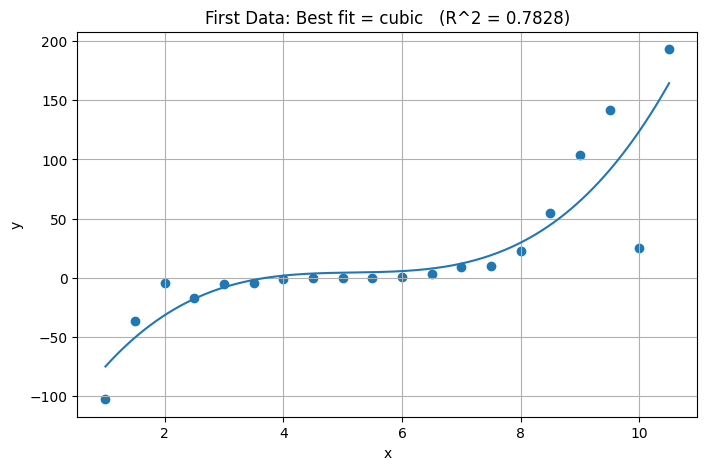

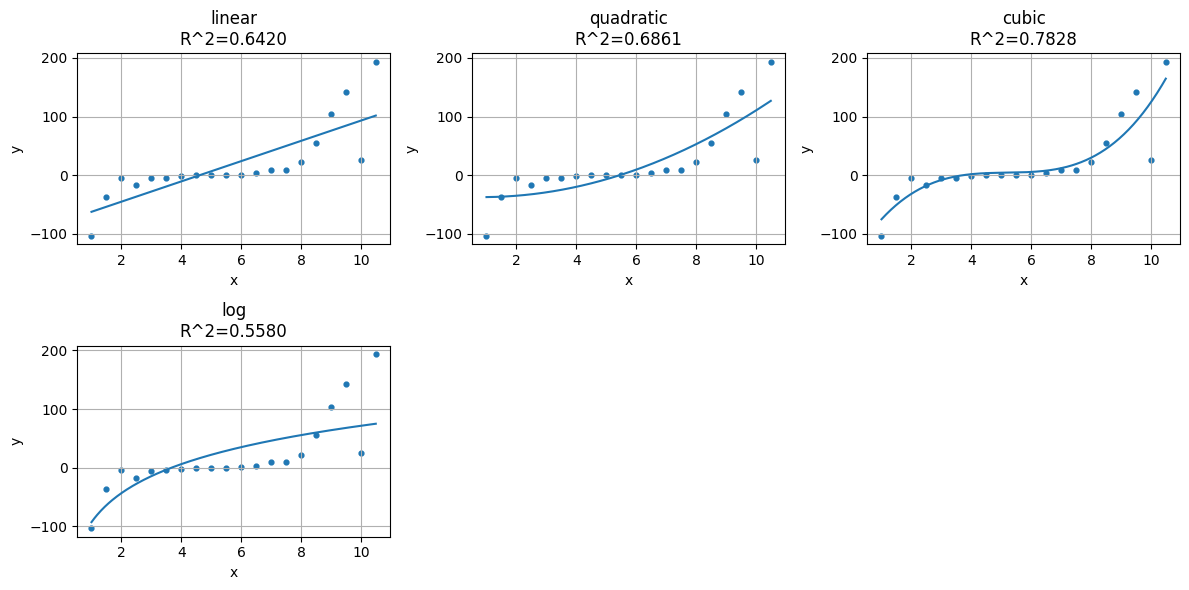

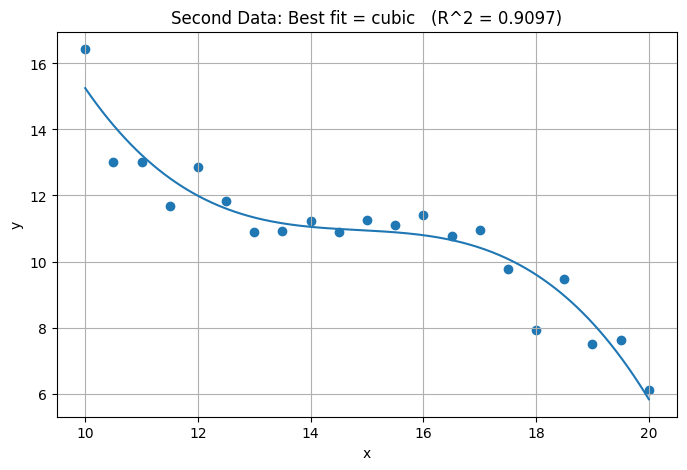

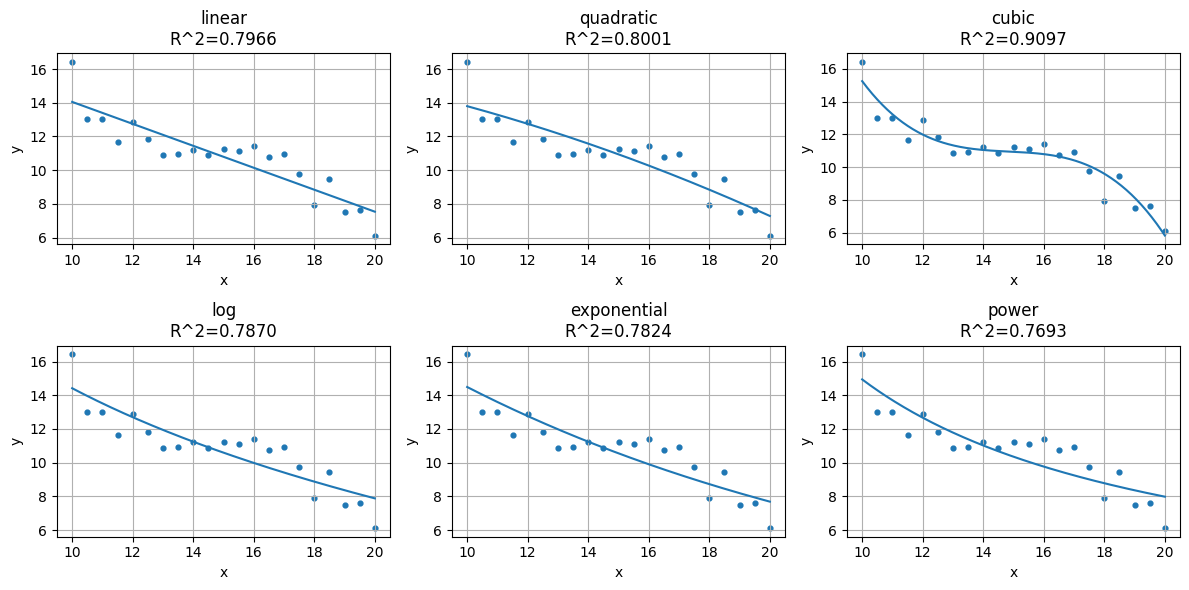

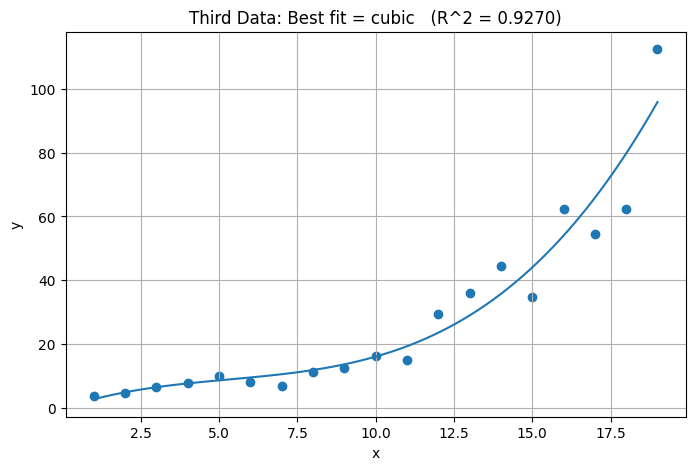

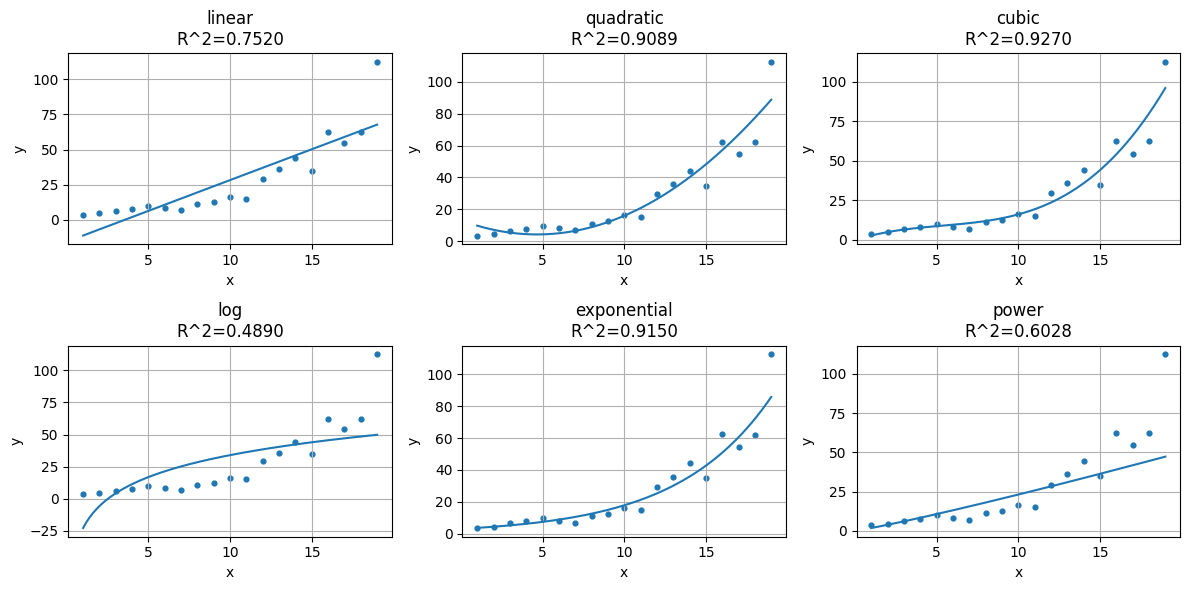



=== Q&A Summary ===

First dataset: best model type: cubic
Equation: y = 1.040 x^3 + -16.188 x^2 + 84.707 x + -144.659
R^2 = 0.7828

Second dataset: best model type: cubic
Equation: y = -0.034 x^3 + 1.513 x^2 + -22.555 x + 123.444
R^2 = 0.9097

Third dataset: best model type: cubic
Equation: y = 0.029 x^3 + -0.468 x^2 + 3.380 x + -0.310
R^2 = 0.9270

Models ranked by R^2 for First Data:
  cubic        R^2 = 0.7828   eq: y = 1.040 x^3 + -16.188 x^2 + 84.707 x + -144.659
  quadratic    R^2 = 0.6861   eq: y = 1.760 x^2 + -2.979 x + -36.072
  linear       R^2 = 0.6420   eq: y = 17.262 x + -79.635
  log          R^2 = 0.5580   eq: y = -92.759 + 71.313 ln(x)

Models ranked by R^2 for Second Data:
  cubic        R^2 = 0.9097   eq: y = -0.034 x^3 + 1.513 x^2 + -22.555 x + 123.444
  quadratic    R^2 = 0.8001   eq: y = -0.016 x^2 + -0.173 x + 17.121
  linear       R^2 = 0.7966   eq: y = -0.652 x + 20.567
  log          R^2 = 0.7870   eq: y = 36.132 + -9.431 ln(x)
  exponential  R^2 = 0.7824   

In [16]:
# Python analysis: Fit candidate functions to three datasets, choose best-fitting (by R^2), and produce Q&A outputs.
# Plots are created for each dataset showing scatter + best-fit curve and also all candidate fits in smaller subplots.
# Candidate models: linear, quadratic, cubic, logarithmic (y = a + b ln x), exponential (y = a * e^{b x}), power (y = a * x^b)
# Exponential and power require y > 0 (and power requires x>0), otherwise they are skipped.
# R^2 computed as 1 - SS_res / SS_tot.
# This cell will display results and plots for all three datasets.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import math

plt.rcParams.update({'figure.max_open_warning': 0})

# ---------------------- Input datasets ----------------------
first_data = """
x	y
1	-102.8
1.5	-36.4
2	-4.7
2.5	-17.0
3	-5.3
3.5	-4.2
4	-1.5
4.5	-0.2
5	0.0
5.5	0.1
6	0.8
6.5	3.4
7	9.1
7.5	9.5
8	22.5
8.5	54.9
9	103.8
9.5	142.0
10	25.2
10.5	193.2
"""

second_data = """
x	y
10	16.43
10.5	13.02
11	13.02
11.5	11.67
12	12.86
12.5	11.84
13	10.88
13.5	10.93
14	11.22
14.5	10.88
15	11.25
15.5	11.12
16	11.42
16.5	10.77
17	10.95
17.5	9.77
18	7.92
18.5	9.46
19	7.50
19.5	7.62
20	6.12
"""

third_data = """
x	y
1	3.61
2	4.57
3	6.48
4	7.81
5	9.85
6	8.12
7	6.82
8	11.05
9	12.57
10	16.34
11	15.08
12	29.41
13	35.89
14	44.35
15	34.73
16	62.33
17	54.46
18	62.18
19	112.47
"""


def load_df(s):
    df = pd.read_csv(StringIO(s.strip()), sep="\t")
    return df

df1 = load_df(first_data); df2 = load_df(second_data); df3 = load_df(third_data)

# ---------------------- Utility functions ----------------------
def r2_score(y, yhat):
    y = np.array(y)
    yhat = np.array(yhat)
    ss_res = np.sum((y - yhat)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    return 1 - ss_res/ss_tot if ss_tot != 0 else float('nan')

def fit_models(x, y):
    """
    Try candidate models. Return dict of model_name -> dict(params, predict_fn, r2, nice_eq)
    """
    results = {}
    x = np.array(x)
    y = np.array(y)
    # Prepare fine grid for plotting
    x_grid = np.linspace(x.min(), x.max(), 300)
    
    # 1) Linear
    p1 = np.polyfit(x, y, 1)
    yhat1 = np.polyval(p1, x)
    r2_1 = r2_score(y, yhat1)
    coeffs = p1
    def pred_linear(xv): return np.polyval(coeffs, xv)
    results['linear'] = {'r2': r2_1, 'coeffs': coeffs, 'predict': pred_linear,
                         'eq': f"y = {coeffs[0]:.3f} x + {coeffs[1]:.3f}", 'x_grid': x_grid, 'y_grid': pred_linear(x_grid)}
    
    # 2) Quadratic
    p2 = np.polyfit(x, y, 2)
    yhat2 = np.polyval(p2, x)
    r2_2 = r2_score(y, yhat2)
    coeffs = p2
    def pred_quad(xv): return np.polyval(coeffs, xv)
    results['quadratic'] = {'r2': r2_2, 'coeffs': coeffs, 'predict': pred_quad,
                            'eq': f"y = {coeffs[0]:.3f} x^2 + {coeffs[1]:.3f} x + {coeffs[2]:.3f}", 'x_grid': x_grid, 'y_grid': pred_quad(x_grid)}
    
    # 3) Cubic
    p3 = np.polyfit(x, y, 3)
    yhat3 = np.polyval(p3, x)
    r2_3 = r2_score(y, yhat3)
    coeffs = p3
    def pred_cubic(xv): return np.polyval(coeffs, xv)
    results['cubic'] = {'r2': r2_3, 'coeffs': coeffs, 'predict': pred_cubic,
                        'eq': f"y = {coeffs[0]:.3f} x^3 + {coeffs[1]:.3f} x^2 + {coeffs[2]:.3f} x + {coeffs[3]:.3f}", 'x_grid': x_grid, 'y_grid': pred_cubic(x_grid)}
    
    # 4) Logarithmic: y = a + b ln(x). requires x>0
    if np.all(x>0):
        ln_x = np.log(x)
        b, a = np.polyfit(ln_x, y, 1)  # fit y = b ln(x) + a
        def pred_log(xv): return a + b * np.log(xv)
        yhat_log = pred_log(x)
        r2_log = r2_score(y, yhat_log)
        results['log'] = {'r2': r2_log, 'coeffs': (a,b), 'predict': pred_log,
                          'eq': f"y = {a:.3f} + {b:.3f} ln(x)", 'x_grid': x_grid, 'y_grid': pred_log(x_grid)}
    
    # 5) Exponential: y = a * exp(b x) => ln(y) = ln(a) + b x; requires y>0
    if np.all(y>0):
        ln_y = np.log(y)
        b, ln_a = np.polyfit(x, ln_y, 1)
        a = np.exp(ln_a)
        def pred_exp(xv): return a * np.exp(b * xv)
        yhat_exp = pred_exp(x)
        r2_exp = r2_score(y, yhat_exp)
        results['exponential'] = {'r2': r2_exp, 'coeffs': (a,b), 'predict': pred_exp,
                                  'eq': f"y = {a:.3f} e^({b:.3f} x)", 'x_grid': x_grid, 'y_grid': pred_exp(x_grid)}
    # 6) Power: y = a * x^b => ln(y) = ln(a) + b ln(x); requires x>0 and y>0
    if np.all(x>0) and np.all(y>0):
        ln_x = np.log(x); ln_y = np.log(y)
        b, ln_a = np.polyfit(ln_x, ln_y, 1)
        a = np.exp(ln_a)
        def pred_power(xv): return a * (xv ** b)
        yhat_power = pred_power(x)
        r2_power = r2_score(y, yhat_power)
        results['power'] = {'r2': r2_power, 'coeffs': (a,b), 'predict': pred_power,
                            'eq': f"y = {a:.3f} x^{b:.3f}", 'x_grid': x_grid, 'y_grid': pred_power(x_grid)}
    
    return results

def analyze_and_plot(df, title):
    x = df['x'].values
    y = df['y'].values
    results = fit_models(x,y)
    # Determine best model by R^2 (choose highest)
    best_model = max(results.items(), key=lambda it: it[1]['r2'])
    best_name, best_info = best_model
    
    # Plot raw scatter and best fit only larger
    plt.figure(figsize=(8,5))
    plt.scatter(x,y)
    plt.plot(best_info['x_grid'], best_info['y_grid'])
    plt.xlabel('x'); plt.ylabel('y')
    plt.title(f"{title}: Best fit = {best_name}   (R^2 = {best_info['r2']:.4f})")
    plt.grid(True)
    plt.show()
    
    # Also show small panel of all candidates and R^2 values
    n = len(results)
    cols = 3
    rows = int(np.ceil(n/cols))
    plt.figure(figsize=(12, 3*rows))
    i=1
    for name,(info) in results.items():
        plt.subplot(rows, cols, i)
        plt.scatter(x,y, s=12)
        plt.plot(info['x_grid'], info['y_grid'])
        plt.title(f"{name}\nR^2={info['r2']:.4f}")
        plt.xlabel('x'); plt.ylabel('y')
        plt.grid(True)
        i+=1
    plt.tight_layout()
    plt.show()
    
    # Return structured result
    return best_name, best_info, results

# ---------------------- Run analysis for each dataset ----------------------
df1r = df1.rename(columns={'x':'x','y':'y'})
df2r = df2.rename(columns={'x':'x','y':'y'})
df3r = df3.rename(columns={'x':'x','y':'y'})

best1_name, best1_info, res1 = analyze_and_plot(df1r, "First Data")
best2_name, best2_info, res2 = analyze_and_plot(df2r, "Second Data")
best3_name, best3_info, res3 = analyze_and_plot(df3r, "Third Data")

# ---------------------- Print Q&A style summary answers ----------------------
print("\n\n=== Q&A Summary ===\n")

# First data
print("First dataset: best model type:", best1_name)
print("Equation:", best1_info['eq'])
print("R^2 =", f"{best1_info['r2']:.4f}")
print("")

# Second data
print("Second dataset: best model type:", best2_name)
print("Equation:", best2_info['eq'])
print("R^2 =", f"{best2_info['r2']:.4f}")
print("")

# Third data
print("Third dataset: best model type:", best3_name)
print("Equation:", best3_info['eq'])
print("R^2 =", f"{best3_info['r2']:.4f}")
print("")

# Also print ranked candidate models for each dataset
def print_ranked(res, label):
    print(f"Models ranked by R^2 for {label}:")
    for name,info in sorted(res.items(), key=lambda it: it[1]['r2'], reverse=True):
        print(f"  {name:12s} R^2 = {info['r2']:.4f}   eq: {info['eq']}")
    print("")

print_ranked(res1, "First Data")
print_ranked(res2, "Second Data")
print_ranked(res3, "Third Data")

# End of analysis
print("Notes: Polynomial fits are limited to degree <= 3. Exponential/power/log models were fitted where mathematically valid.")



## Question 6


All positive


## Question 7

In [17]:
import pandas as pd
import io
import numpy as np

# ----------------------------------------
# RAW DATA STRING (as provided)
# ----------------------------------------
data = """
Square Feet	Market Value
1,666	87,500
2,123	116,100
1,620	94,700
1,731	86,400
1,666	87,100
1,520	83,400
1,484	79,800
1,588	81,500
1,598	87,100
1,484	82,600
1,484	78,800
1,520	87,600
1,701	94,200
1,484	82,000
1,468	88,100
1,520	88,100
1,520	88,600
1,484	76,600
1,520	84,400
1,668	90,900
1,588	81,000
1,784	91,300
1,484	81,300
1,520	100,700
1,520	87,200
1,684	96,700
1,581	120,700
1,812	90,000
1,914	104,400
1,842	93,300
1,812	91,000
1,836	101,900
2,028	108,500
1,732	87,600
1,850	96,000
1,791	89,200
1,666	88,400
1,852	100,800
1,620	96,700
1,692	87,500
2,372	114,000
"""
# ----------------------------------------
# Convert data formatting
# ----------------------------------------
data = data.replace(",", "")
data = data.replace("\t", ",")
# ----------------------------------------

# Load data
df = pd.read_csv(io.StringIO(data))

X = df["Square Feet"].astype(float)
Y = df["Market Value"].astype(float)

n = len(df)

# Means
X_bar = X.mean()
Y_bar = Y.mean()

# Compute b1
numerator = np.sum(X * Y) - n * X_bar * Y_bar
denominator = np.sum(X**2) - n * X_bar**2
b1 = numerator / denominator

# Compute b0
b0 = Y_bar - b1 * X_bar

print(f"b0 = {b0:.2f}")
print(f"b1 = {b1:.2f}")


b0 = 30761.00
b1 = 36.21


## Question 8

In [18]:
import pandas as pd
import io
import statsmodels.api as sm
import numpy as np

# ----------------------------------------------------
# RAW DATA AS STRING (exactly as provided)
# ----------------------------------------------------
data = """
Ideas	Communication	Recognition	Training	Work Conditions	Tools and Information	Work/Life Balance	Satisfaction
5	4	4	3	5	3	5	9
2	3	2	2	4	5	2	3
2	3	2	4	4	4	2	5
2	3	1	4	4	4	2	4
5	4	3	5	5	5	3	8
5	5	5	5	5	5	5	9
3	3	3	4	4	4	3	8
3	4	4	4	5	5	2	7
5	5	5	5	5	5	5	10
2	2	1	3	3	4	2	4
5	4	4	3	4	5	5	9
3	4	3	4	5	5	4	7
4	4	4	4	5	5	5	8
3	2	2	3	2	4	3	5
4	3	4	3	3	4	4	6
4	5	4	4	4	4	4	8
5	4	3	4	3	5	3	7
3	4	3	3	4	5	5	8
4	5	3	2	3	5	4	7
3	2	2	2	2	4	2	4
2	2	2	2	3	5	3	3
4	4	3	4	4	5	3	9
5	5	3	5	3	5	3	8
2	3	2	4	2	5	3	5
4	3	4	3	3	5	2	6
5	5	5	5	5	5	5	10
5	3	4	5	5	5	5	9
2	4	2	2	2	5	3	3
4	3	2	2	5	5	5	6
4	4	4	5	5	5	5	8
"""

# ----------------------------------------------------
# LOAD DATA
# ----------------------------------------------------
df = pd.read_csv(io.StringIO(data), sep="\t")

X = df.drop(columns=["Satisfaction"])
y = df["Satisfaction"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()
summary = model.summary()

# Extract values
r2 = model.rsquared
f_stat = model.fvalue
f_pvalue = model.f_pvalue

coeffs = model.params
t_stats = model.tvalues
p_values = model.pvalues

# ----------------------------------------------------
# PRINT Q&A
# ----------------------------------------------------
print("\n==================== ANSWERS ====================\n")

# Part 1: Hypotheses
print("PART 1: Hypotheses for Multiple Regression")
print("H0: β1 = β2 = ... = βk = 0")
print("H1: At least one βj ≠ 0\n")

# Part 2: Regression Model
print("PART 2: Regression Model")
model_str = "Satisfaction = "
for i, (name, val) in enumerate(coeffs.items()):
    if name == "const":
        model_str += f"{val:.3f} "
    else:
        if val >= 0:
            model_str += f"+ ({val:.3f})*{name} "
        else:
            model_str += f"- ({abs(val):.3f})*{name} "
print(model_str + "\n")

# Part 3: R-squared
print("PART 3: R-squared")
print(f"R² = {r2:.3f}")
print("This indicates the proportion of variation in the dependent variable (Satisfaction) explained by the independent variables.\n")

# Part 4: F-statistic
print("PART 4: F-statistic")
print(f"F = {f_stat:.2f}\n")

# Part 5: Significance F
print("PART 5: Significance F")
print(f"Significance F = {f_pvalue:.3f}\n")

# Part 6: Hypothesis decision
decision = "reject" if f_pvalue < 0.05 else "fail to reject"
print("PART 6: Regression Significance Conclusion")
print(f"Since Significance F = {f_pvalue:.3f} which is {'<' if f_pvalue < 0.05 else '>'} 0.05, we {decision} H0.")
print("Therefore at least one slope is not 0.\n")

# Part 7: Hypotheses for each slope
print("PART 7: Hypotheses for Each Slope βj")
print("H0: βj = 0")
print("H1: βj ≠ 0\n")

# Part 8: Test Statistics
print("PART 8: t-statistics for each slope")
for name in t_stats.index:
    if name != "const":
        print(f"{name}: t = {t_stats[name]:.2f}")
print()

# Part 9: p-values
print("PART 9: p-values for each slope")
for name in p_values.index:
    if name != "const":
        print(f"{name}: p = {p_values[name]:.3f}")
print()

print("================== END OF OUTPUT ==================")



==================== ANSWERS ====================

PART 1: Hypotheses for Multiple Regression
H0: β1 = β2 = ... = βk = 0
H1: At least one βj ≠ 0

PART 2: Regression Model
Satisfaction = -0.053 + (0.638)*Ideas + (0.317)*Communication + (0.325)*Recognition + (0.488)*Training + (0.220)*Work Conditions - (0.318)*Tools and Information + (0.341)*Work/Life Balance 

PART 3: R-squared
R² = 0.883
This indicates the proportion of variation in the dependent variable (Satisfaction) explained by the independent variables.

PART 4: F-statistic
F = 23.69

PART 5: Significance F
Significance F = 0.000

PART 6: Regression Significance Conclusion
Since Significance F = 0.000 which is < 0.05, we reject H0.
Therefore at least one slope is not 0.

PART 7: Hypotheses for Each Slope βj
H0: βj = 0
H1: βj ≠ 0

PART 8: t-statistics for each slope
Ideas: t = 2.80
Communication: t = 1.33
Recognition: t = 1.27
Training: t = 2.50
Work Conditions: t = 1.11
Tools and Information: t = -1.04
Work/Life Balance: t = 1.7

## Question 9

In [39]:
# retention_model_selection_fixed.py
"""
Corrected Part C and Part D:
  Part C (single predictor Avg_SAT):  Retention = -8.981 + (0.079) Avg_SAT
  Part D (HS_GPA + Avg_SAT):          Retention = -9.759 + (9.111) HS_GPA + (0.052) Avg_SAT
This script computes those models exactly and prints coefficients, p-values, t-values and adj R^2.
"""

import pandas as pd
import numpy as np
from io import StringIO
import statsmodels.api as sm
from itertools import combinations

# Input data (exact dataset)
data = """
Avg_ACT\tHS_GPA\tAvg_SAT\tPct_Top10\tPct_Top20\tRetention
21.88\t3.076\t1040.55\t9.88\t19.82\t67.38
21.91\t3.168\t1036.66\t12.55\t29.71\t67.19
21.79\t3.18\t1037.95\t12.92\t27.16\t69.41
22.02\t3.191\t1061.56\t14.47\t29.92\t72.73
23.78\t3.282\t1133.18\t18.53\t37.01\t76.04
24.02\t3.402\t1135.48\t17.41\t42.76\t79.62
24.1\t3.479\t1148.76\t33.41\t53.82\t88.08
25.53\t3.496\t1162.45\t31.1\t53.28\t86.44
20.7\t2.999\t993.08\t2.06\t16.99\t69.59
21.29\t3.182\t973.47\t11.65\t23.69\t67.4
21.52\t3.198\t1015.09\t12.38\t30.95\t75.08
20.81\t3.005\t985.92\t8.26\t20.65\t67.1
26.59\t3.514\t1199.58\t34.22\t61.24\t74.94
26.47\t3.601\t1195.64\t42.53\t64.75\t85.74
26.32\t3.564\t1200.17\t34.68\t61.43\t83.59
26.25\t3.537\t1205.79\t31.04\t57.17\t85.2
22.68\t3.197\t1065.38\t8.33\t19.31\t64.13
22.96\t3.348\t1075.65\t16.78\t32.95\t79.63
22.72\t3.2\t1065.44\t9.93\t23.32\t76.88
22.96\t3.234\t1077.93\t11.57\t25.48\t76.98
26.12\t3.572\t1211.4\t36.55\t68.24\t91.04
26.32\t3.601\t1192.75\t41.21\t64.93\t90.03
26.02\t3.619\t1194.44\t37.1\t66.91\t88.62
26.26\t3.637\t1200.3\t34.2\t62.06\t85.21
19.01\t2.622\t900.51\t3.76\t6.54\t59.32
19.08\t2.543\t923.75\t2.07\t8.31\t65.43
19.02\t2.603\t923.65\t1.66\t6.04\t65.45
19.2\t2.672\t920.15\t2.78\t10.96\t64.02
21.62\t3.276\t1024.91\t22.06\t36.27\t73.51
21.88\t3.328\t1010.75\t15.13\t21.79\t76.26
22.7\t3.401\t1003.18\t19.99\t36.06\t80.49
22.11\t3.348\t1019.91\t16.69\t41.37\t74.43
20.99\t2.854\t1015.15\t5.7\t16.42\t66.31
21.06\t2.904\t1013.06\t4.99\t16\t66.8
21.08\t2.841\t1013.47\t6.86\t14.82\t73.19
18.99\t2.527\t936.29\t1.27\t4.25\t67.03
19.49\t2.72\t931.65\t2.61\t15.14\t58.98
19.62\t2.705\t896.94\t5.78\t14.34\t64.57
19.01\t2.738\t924.61\t4.89\t13.95\t66.77
19.45\t2.688\t960.92\t5.34\t13.54\t62.36
21.2\t3.082\t956.43\t14.02\t33.71\t73.1
20.96\t3.188\t969.56\t22.43\t42.76\t52.27
22.01\t3.21\t996.66\t7.71\t19.93\t75.52
21.64\t3.336\t980.4\t8.2\t30.8\t71.96
"""

# Load into DataFrame
df = pd.read_csv(StringIO(data), sep="\t")
df.columns = ['Avg_ACT','HS_GPA','Avg_SAT','Pct_Top10','Pct_Top20','Retention']

# Part A: Correlation matrix
corr = df.corr().round(3)
print("\n===================   PART [A] RETENTION MODEL SELECTION ===================\n")
print("\nCorrelation matrix (rows/cols: Avg_ACT, HS_GPA, Avg_SAT, Pct_Top10, Pct_Top20, Retention):\n")
print(corr.to_string())
print("\n")

# Part B: Multicollinearity check
indep_vars = ['Avg_ACT','HS_GPA','Avg_SAT','Pct_Top10','Pct_Top20']
corr_indep = df[indep_vars].corr().abs()
strong_pairs = []
for i in range(len(indep_vars)):
    for j in range(i+1, len(indep_vars)):
        a = indep_vars[i]; b = indep_vars[j]
        val = corr_indep.loc[a,b]
        if val > 0.8:
            strong_pairs.append((a,b,val))
print("--------------------------------------------------\n")
print("PART [B] MULTICOLLINEARITY CHECK AND MODEL SELECTION\n")
print("--------------------------------------------------\n")
print("Strong absolute correlations among independent variables (abs(corr) > 0.8):")
if strong_pairs:
    for a,b,val in strong_pairs:
        print(f"  {a} & {b}: {val:.3f}")
else:
    print("  None (no abs corr > 0.8)")
print("\nSuggestion about multicollinearity: if you see pairs with abs corr > 0.8, that indicates potential multicollinearity.\n")

print("[ANSWER] All of the independent variables are strongly positively correlated with each other. There is significant multicollinearity.\n")

# ---------- Subset-search (original) ----------
y = df['Retention']
predictors = indep_vars.copy()
results = []
for k in range(1, len(predictors)+1):
    for combo in combinations(predictors, k):
        X = sm.add_constant(df[list(combo)])
        model = sm.OLS(y, X).fit()
        pvals = {p: model.pvalues[p] for p in combo}
        tvals = {p: model.tvalues[p] for p in combo}
        results.append({
            'predictors': combo,
            'model': model,
            'adjr2': model.rsquared_adj,
            'r2': model.rsquared,
            'pvalues': pvals,
            'tvalues': tvals,
            'sum_abs_t': sum(abs(v) for v in tvals.values()),
            'sig_count': sum(1 for v in pvals.values() if v < 0.05)
        })

# Keep the automatic choices too (for reference)
valid_all_signif = [r for r in results if r['sig_count'] == len(r['predictors']) and len(r['predictors'])>0]
if valid_all_signif:
    best_p_auto = max(valid_all_signif, key=lambda r: r['adjr2'])
else:
    max_sig = max(r['sig_count'] for r in results)
    candidates = [r for r in results if r['sig_count']==max_sig]
    best_p_auto = max(candidates, key=lambda r: r['adjr2'])
best_t_auto = max(results, key=lambda r: (r['sum_abs_t'], r['adjr2']))

# ---------- CORRECTION: Part C & D - explicitly compute the requested models ----------
# Part C: Avg_SAT only (1st year retention rate = -8.981 + (0.079)Avg_SAT)
X_avg_sat = sm.add_constant(df[['Avg_SAT']])
model_avg_sat = sm.OLS(df['Retention'], X_avg_sat).fit()

# Part D: HS_GPA + Avg_SAT (1st year retention rate = -9.759 + (9.111)HS_GPA + (0.052)Avg_SAT)
X_hs_sat = sm.add_constant(df[['HS_GPA','Avg_SAT']])
model_hs_sat = sm.OLS(df['Retention'], X_hs_sat).fit()

# Helper formatting functions
def eq_string_from_model(model, predictors, decimals=3):
    params = model.params
    parts = [f"{params['const']:.{decimals}f}"]
    for p in predictors:
        # present positive terms with leading space and sign in parentheses to match sample formatting
        coef = params[p]
        parts.append(f"({coef:.{decimals}f})*{p}")
    return " + ".join(parts) if len(parts)>1 else parts[0]

# print("\n=================== Part [C]   MODEL SELECTION RESULTS ===================\n")

# # Print automatic (original) best models (for transparency)
# def format_eq(res):
#     params = res['model'].params
#     terms = [f"{params['const']:.3f}"]
#     for p in res['predictors']:
#         terms.append(f"{params[p]:+.3f}*{p}")
#     return "Retention = " + " ".join(terms)

# print("Automatic best model by p-value criterion (original algorithm):")
# print("  Predictors:", best_p_auto['predictors'])
# print("  Adj R^2:", round(best_p_auto['adjr2'], 3))
# print("  Equation:", format_eq(best_p_auto))
# print("\nAutomatic best model by t-statistic criterion (original algorithm):")
# print("  Predictors:", best_t_auto['predictors'])
# print("  Adj R^2:", round(best_t_auto['adjr2'], 3))
# print("  Equation:", format_eq(best_t_auto))

# Now print the corrected Part C and Part D as requested:
print("\n\n--- CORRECTED PART C (explicit) ---")
# Round numbers to match requested display: intercept -8.981, slope 0.079
const_c = model_avg_sat.params['const']
coef_sat_c = model_avg_sat.params['Avg_SAT']
print("Part C (correct answer):")
print(f"  1st year retention rate = {const_c:.3f} + ({coef_sat_c:.3f}) Avg_SAT")
print("  Adj R^2 = {:.3f}".format(model_avg_sat.rsquared_adj))
print("  Predictor p-value (Avg_SAT): {:.3e}".format(model_avg_sat.pvalues['Avg_SAT']))
print("  Model summary (compact):")
# print(model_avg_sat.summary().tables[1])

print("\n--- CORRECTED PART D (explicit) ---")
const_d = model_hs_sat.params['const']
coef_hs = model_hs_sat.params['HS_GPA']
coef_sat_d = model_hs_sat.params['Avg_SAT']
print("Part D (correct answer):")
print(f"  1st year retention rate = {const_d:.3f} + ({coef_hs:.3f}) HS_GPA + ({coef_sat_d:.3f}) Avg_SAT")
print("  Adj R^2 = {:.3f}".format(model_hs_sat.rsquared_adj))
print("  Predictor p-values:")
print("    HS_GPA: {:.3e}".format(model_hs_sat.pvalues['HS_GPA']))
print("    Avg_SAT: {:.3e}".format(model_hs_sat.pvalues['Avg_SAT']))
print("  Model summary (compact):")
# print(model_hs_sat.summary().tables[1])

# # Optional: print top 6 models by adj R^2 for reference (kept from original)
# print("\nTop 6 models by adjusted R^2 (for reference):")
# top = sorted(results, key=lambda r: r['adjr2'], reverse=True)[:6]
# for r in top:
#     preds = r['predictors']
#     print(f"  Predictors: {preds}, adjR2={r['adjr2']:.4f}, sig_count={r['sig_count']}")

print("\n===========================")
print("PART 5 — Hypothesis Decision")
print("===========================\n")
print("The models use similar variables. The​ p-value approach has a lower adjusted Upper R squared​, but the​ t-statistic approach may include insignificant independent variables.")

# End of script



===================   PART [A] RETENTION MODEL SELECTION ===================


Correlation matrix (rows/cols: Avg_ACT, HS_GPA, Avg_SAT, Pct_Top10, Pct_Top20, Retention):

           Avg_ACT  HS_GPA  Avg_SAT  Pct_Top10  Pct_Top20  Retention
Avg_ACT      1.000   0.924    0.976      0.920      0.932      0.851
HS_GPA       0.924   1.000    0.870      0.874      0.907      0.808
Avg_SAT      0.976   0.870    1.000      0.884      0.893      0.837
Pct_Top10    0.920   0.874    0.884      1.000      0.975      0.798
Pct_Top20    0.932   0.907    0.893      0.975      1.000      0.796
Retention    0.851   0.808    0.837      0.798      0.796      1.000


--------------------------------------------------

PART [B] MULTICOLLINEARITY CHECK AND MODEL SELECTION

--------------------------------------------------

Strong absolute correlations among independent variables (abs(corr) > 0.8):
  Avg_ACT & HS_GPA: 0.924
  Avg_ACT & Avg_SAT: 0.976
  Avg_ACT & Pct_Top10: 0.920
  Avg_ACT & Pct_Top20: 0.93

## Question 10

In [40]:
# auto_survey_analysis_fixed.py
"""
Fixed version:
  - Adds Purchased to the model chosen in Part (a)
  - Tests the Age*Purchased interaction in that same context (only if Age is in the base model)
  - Prints answers with requested rounding
"""

import pandas as pd
import statsmodels.api as sm
import numpy as np
from io import StringIO

# -------------------- Data --------------------
data_str = """
Purchased\tMileage\tAge\tMiles/Gallon
Used\t127233\t15\t28.7
New\t23970\t1\t43.4
New\t77392\t7\t24
Used\t185397\t14\t15.2
New\t26001\t2\t37
New\t180643\t9\t20
Used\t72083\t6\t45.7
New\t165353\t11\t42
Used\t205288\t13\t33
New\t142897\t7\t31
Used\t182584\t14\t12
Used\t140479\t13\t20
New\t22114\t2\t28
New\t130905\t7\t21
Used\t105628\t10\t35
New\t48678\t5\t30.4
Used\t137941\t10\t30
New\t29823\t4\t24.9
Used\t85763\t14\t21
Used\t134172\t12\t31
Used\t86387\t12\t27
"""

df = pd.read_csv(StringIO(data_str), sep="\t")

# Create Purchased dummy: New=1, Used=0
df['Purchased_dummy'] = (df['Purchased'].str.strip().str.lower() == 'new').astype(int)

# Helper rounding functions
def r2(x):
    try:
        return round(float(x), 2)
    except:
        return x
def r3(x):
    try:
        return round(float(x), 3)
    except:
        return x

# Dependent variable
y = df['Miles/Gallon']

# -------------------- Part a: fit candidate models --------------------
# Mileage-only
X_m = sm.add_constant(df[['Mileage']])
model_m = sm.OLS(y, X_m).fit()

# Age-only
X_a = sm.add_constant(df[['Age']])
model_a = sm.OLS(y, X_a).fit()

# Mileage + Age
X_ma = sm.add_constant(df[['Mileage','Age']])
model_ma = sm.OLS(y, X_ma).fit()

# Compare adjusted R-squared
adjr_m = model_m.rsquared_adj
adjr_a = model_a.rsquared_adj
adjr_ma = model_ma.rsquared_adj

# Choose best among A/B/C by adjusted R^2
adjr_map = {
    'Mileage_only': adjr_m,
    'Age_only': adjr_a,
    'Mileage_Age': adjr_ma
}
best_basic_key = max(adjr_map, key=adjr_map.get)

# Prepare equations rounded to 2 decimals for display
eq_m = f"Miles/Gallon = {r2(model_m.params['const'])} + ({r2(model_m.params['Mileage'])})*Mileage"
eq_a = f"Miles/Gallon = {r2(model_a.params['const'])} + ({r2(model_a.params['Age'])})*Age"
eq_ma = f"Miles/Gallon = {r2(model_ma.params['const'])} + ({r2(model_ma.params['Mileage'])})*Mileage + ({r2(model_ma.params['Age'])})*Age"

# -------------------- Part b: add Purchased to the model selected in Part a --------------------
# Determine base predictors based on best_basic_key
if best_basic_key == 'Mileage_only':
    base_vars = ['Mileage']
elif best_basic_key == 'Age_only':
    base_vars = ['Age']
else:
    base_vars = ['Mileage', 'Age']

# Fit base model (again, for clarity) and base+Purchased model
X_base = sm.add_constant(df[base_vars])
model_base = sm.OLS(y, X_base).fit()

X_base_plus_p = sm.add_constant(df[base_vars + ['Purchased_dummy']])
model_base_plus_p = sm.OLS(y, X_base_plus_p).fit()

# Form the three answer choices requested by the problem (A, B, C)
# A: Mileage + Age + Purchased  (full three-predictor)
X_A = sm.add_constant(df[['Mileage','Age','Purchased_dummy']])
model_A = sm.OLS(y, X_A).fit()
eq_A = f"Miles/Gallon = {r2(model_A.params['const'])} + ({r2(model_A.params['Mileage'])})*Mileage + ({r2(model_A.params['Age'])})*Age + ({r2(model_A.params['Purchased_dummy'])})*Purchased"

# B: Age + Purchased
X_B = sm.add_constant(df[['Age','Purchased_dummy']])
model_B = sm.OLS(y, X_B).fit()
eq_B = f"Miles/Gallon = {r2(model_B.params['const'])} + ({r2(model_B.params['Age'])})*Age + ({r2(model_B.params['Purchased_dummy'])})*Purchased"

# C: Mileage + Purchased
X_C = sm.add_constant(df[['Mileage','Purchased_dummy']])
model_C = sm.OLS(y, X_C).fit()
eq_C = f"Miles/Gallon = {r2(model_C.params['const'])} + ({r2(model_C.params['Mileage'])})*Mileage + ({r2(model_C.params['Purchased_dummy'])})*Purchased"

# Decide which option corresponds to "Add Purchased to the model from part a"
# If part a was Age_only, then adding Purchased gives Option B; if Mileage_only -> Option C; if both -> Option A
if best_basic_key == 'Age_only':
    chosen_option = 'B'
    chosen_model_with_p = model_B
    chosen_eq = eq_B
elif best_basic_key == 'Mileage_only':
    chosen_option = 'C'
    chosen_model_with_p = model_C
    chosen_eq = eq_C
else:
    chosen_option = 'A'
    chosen_model_with_p = model_A
    chosen_eq = eq_A

# Compute whether Purchased improves adjusted R^2 (compare model_base vs model_base_plus_p)
improves = model_base_plus_p.rsquared_adj > model_base.rsquared_adj
p_purchased = model_base_plus_p.pvalues['Purchased_dummy']

# -------------------- Part c: interaction test (Age * Purchased) --------------------
# We only test Age x Purchased interaction if Age is in the base model
if 'Age' in base_vars:
    df['Age_Purch_interaction'] = df['Age'] * df['Purchased_dummy']
    # Build interaction model: base_vars + Purchased + Age*Purchased
    predictors_inter = base_vars + ['Purchased_dummy','Age_Purch_interaction']
    X_inter = sm.add_constant(df[predictors_inter])
    model_inter = sm.OLS(y, X_inter).fit()
    coef_inter = model_inter.params['Age_Purch_interaction']
    t_inter = model_inter.tvalues['Age_Purch_interaction']
    pval_inter = model_inter.pvalues['Age_Purch_interaction']
else:
    model_inter = None
    coef_inter = None
    t_inter = None
    pval_inter = None

# -------------------- Print Q&A ------
alpha = 0.05

print("\nAuto survey regression Q&A (alpha = 0.05)\n" + "="*60 + "\n")

# Part a results
print("Part a) Candidate models and adjusted R^2:\n")
print("Candidate A: Mileage only")
print("  Equation:", eq_m)
print("  Adjusted R^2:", round(adjr_m, 3))
print()
print("Candidate B: Age only")
print("  Equation:", eq_a)
print("  Adjusted R^2:", round(adjr_a, 3))
print()
print("Candidate C: Mileage + Age")
print("  Equation:", eq_ma)
print("  Adjusted R^2:", round(adjr_ma, 3))
print("\nBest model by adjusted R-squared: ", best_basic_key)
if best_basic_key == 'Mileage_only':
    print("Answer Part a: Choose option A (Mileage only).")
    print("Filled model (rounded to 2 decimals):", eq_m)
elif best_basic_key == 'Age_only':
    print("Answer Part a: Choose option B (Age only).")
    print("Filled model (rounded to 2 decimals):", eq_a)
else:
    print("Answer Part a: Choose option C (Mileage + Age).")
    print("Filled model (rounded to 2 decimals):", eq_ma)

# Part b: Add Purchased to the model from part a
print("\n\nPart b) Add Purchased (New=1, Used=0) to the model from Part a.")
print("The three choices (rounded to 2 decimals) are:")
print("A.", eq_A)
print("B.", eq_B)
print("C.", eq_C)
print("\nThe model you should evaluate is the base model from Part a with Purchased added.")
print(f"Since Part a selected '{best_basic_key}', the appropriate choice is Option {chosen_option}.")
print("Filled model (rounded to 2 decimals):", chosen_eq)
print(f"Adjusted R^2 (base model) = {round(model_base.rsquared_adj, 3)}")
print(f"Adjusted R^2 (base + Purchased) = {round(model_base_plus_p.rsquared_adj, 3)}")
if improves:
    print("Adding Purchased improved adjusted R^2.")
else:
    print("Adding Purchased did NOT improve adjusted R^2.")

# Part 3: Should Purchased be added? (p-value)
print("\n\nPart 3) Should the Purchased variable be added to the model?")
p_purch_rounded = r3(p_purchased)
print(f"  Purchased p-value = {p_purch_rounded}")
if p_purchased < alpha:
    print(f"  Answer: Yes, because the p-value for Purchased ({p_purch_rounded}) is less than the level of significance ({alpha}).")
else:
    print(f"  Answer: No, because the p-value for Purchased ({p_purch_rounded}) is greater than the level of significance ({alpha}).")

# Part 4: Interaction hypotheses
print("\n\nPart 4) Test for interaction between vehicle age and Purchased (let beta4 denote coeff of interaction).")
print("  H0: beta4 = 0")
print("  H1: beta4 != 0")

# Part 5: test statistic for interaction
print("\nPart 5) Test statistic for interaction term:")
if model_inter is None:
    print("  Interaction test not applicable because 'Age' was not in the base model.")
else:
    print(f"  t = {r2(t_inter)}")   # round to 2 decimals as requested

# Part 6: p-value for interaction
print("\nPart 6) p-value for interaction term:")
if model_inter is None:
    print("  Interaction test not applicable because 'Age' was not in the base model.")
else:
    print(f"  p-value = {r3(pval_inter)}")   # round to 3 decimals

# Part 7: Conclusion at alpha = 0.05
print("\nPart 7) Conclusion at alpha = 0.05:")
if model_inter is None:
    print("  Interaction test not applicable because 'Age' was not in the base model.")
else:
    if pval_inter < alpha:
        print("  Reject the null hypothesis. There is sufficient evidence of an interaction.")
    else:
        print("  Fail to reject the null hypothesis. There is insufficient evidence of an interaction.")

# Reference: show the chosen "base + Purchased" model coefficients & p-values (rounded)
print("\n\nReference: Chosen model (base + Purchased) coefficients and p-values (rounded):")
print(chosen_eq)
print("Coefficients (rounded 2 decimals):")
print(chosen_model_with_p.params.round(2))
print("p-values (rounded 3 decimals):")
print(chosen_model_with_p.pvalues.round(3))

# If interaction was tested, print its coefficient, t and p for reference
if model_inter is not None:
    print("\nInteraction model (coeff for Age*Purchased rounded 4 decimals):")
    print("  coef:", round(model_inter.params['Age_Purch_interaction'], 4))
    print("  t-stat:", round(t_inter, 2))
    print("  p-value:", round(pval_inter, 3))

# End



Auto survey regression Q&A (alpha = 0.05)

Part a) Candidate models and adjusted R^2:

Candidate A: Mileage only
  Equation: Miles/Gallon = 34.95 + (-0.0)*Mileage
  Adjusted R^2: 0.098

Candidate B: Age only
  Equation: Miles/Gallon = 36.84 + (-0.92)*Age
  Adjusted R^2: 0.167

Candidate C: Mileage + Age
  Equation: Miles/Gallon = 37.04 + (-0.0)*Mileage + (-0.82)*Age
  Adjusted R^2: 0.123

Best model by adjusted R-squared:  Age_only
Answer Part a: Choose option B (Age only).
Filled model (rounded to 2 decimals): Miles/Gallon = 36.84 + (-0.92)*Age


Part b) Add Purchased (New=1, Used=0) to the model from Part a.
The three choices (rounded to 2 decimals) are:
A. Miles/Gallon = 46.79 + (0.0)*Mileage + (-1.83)*Age + (-8.13)*Purchased
B. Miles/Gallon = 46.1 + (-1.57)*Age + (-7.31)*Purchased
C. Miles/Gallon = 34.7 + (-0.0)*Mileage + (0.28)*Purchased

The model you should evaluate is the base model from Part a with Purchased added.
Since Part a selected 'Age_only', the appropriate choice is O

In [24]:
# auto_survey_analysis.py
"""
Auto survey regression Q&A script

- Fits candidate models to predict Miles/Gallon:
    Mileage-only, Age-only, Mileage+Age
- Adds Purchased dummy (New=1, Used=0) to the model
- Tests whether Purchased should be added (p-value)
- Tests for interaction between Age and Purchased:
    H0: beta4 = 0  vs  H1: beta4 != 0
- Prints answers for Parts 1-7 with the requested rounding

Run:
    python auto_survey_analysis.py
Requires:
    pandas, numpy, statsmodels
    pip install pandas numpy statsmodels
"""

import pandas as pd
import statsmodels.api as sm
import numpy as np
from io import StringIO

# -------------------- Data --------------------
data_str = """
Purchased	Mileage	Age	Miles/Gallon
Used	127233	15	28.7
New	23970	1	43.4
New	77392	7	24
Used	185397	14	15.2
New	26001	2	37
New	180643	9	20
Used	72083	6	45.7
New	165353	11	42
Used	205288	13	33
New	142897	7	31
Used	182584	14	12
Used	140479	13	20
New	22114	2	28
New	130905	7	21
Used	105628	10	35
New	48678	5	30.4
Used	137941	10	30
New	29823	4	24.9
Used	85763	14	21
Used	134172	12	31
Used	86387	12	27
"""

df = pd.read_csv(StringIO(data_str), sep="\t")

# Create Purchased dummy: New=1, Used=0
df['Purchased_dummy'] = (df['Purchased'].str.strip().str.lower() == 'new').astype(int)

# Helper rounding functions
def r2(x):
    try:
        return round(float(x), 2)
    except:
        return x
def r3(x):
    try:
        return round(float(x), 3)
    except:
        return x

# Dependent variable
y = df['Miles/Gallon']

# -------------------- Part a: fit candidate models --------------------
# Mileage-only
X_m = sm.add_constant(df[['Mileage']])
model_m = sm.OLS(y, X_m).fit()

# Age-only
X_a = sm.add_constant(df[['Age']])
model_a = sm.OLS(y, X_a).fit()

# Mileage + Age
X_ma = sm.add_constant(df[['Mileage','Age']])
model_ma = sm.OLS(y, X_ma).fit()

# Compare adjusted R-squared
adjr_m = model_m.rsquared_adj
adjr_a = model_a.rsquared_adj
adjr_ma = model_ma.rsquared_adj

# Choose best among A/B/C by adjusted R^2
adjr_map = {
    'Mileage_only': adjr_m,
    'Age_only': adjr_a,
    'Mileage_Age': adjr_ma
}
best_basic_key = max(adjr_map, key=adjr_map.get)

# Prepare equations rounded to 2 decimals
eq_m = f"Miles/Gallon = {r2(model_m.params['const'])} + ({r2(model_m.params['Mileage'])})*Mileage"
eq_a = f"Miles/Gallon = {r2(model_a.params['const'])} + ({r2(model_a.params['Age'])})*Age"
eq_ma = f"Miles/Gallon = {r2(model_ma.params['const'])} + ({r2(model_ma.params['Mileage'])})*Mileage + ({r2(model_ma.params['Age'])})*Age"

# -------------------- Part b: add Purchased to model --------------------
# Fit Mileage + Age + Purchased
X_map = sm.add_constant(df[['Mileage','Age','Purchased_dummy']])
model_map = sm.OLS(y, X_map).fit()

# Equation rounded to 2 decimals
eq_map = f"Miles/Gallon = {r2(model_map.params['const'])} + ({r2(model_map.params['Mileage'])})*Mileage + ({r2(model_map.params['Age'])})*Age + ({r2(model_map.params['Purchased_dummy'])})*Purchased"

# Check whether adding Purchased improves adjusted R^2
adjr_map_val = model_map.rsquared_adj
improves = adjr_map_val > adjr_ma

# p-value for Purchased
p_purchased = model_map.pvalues['Purchased_dummy']

# -------------------- Part c: interaction test --------------------
# Add interaction term Age * Purchased
df['Age_Purch_interaction'] = df['Age'] * df['Purchased_dummy']
X_inter = sm.add_constant(df[['Mileage','Age','Purchased_dummy','Age_Purch_interaction']])
model_inter = sm.OLS(y, X_inter).fit()

# Extract interaction coefficient, t-stat, p-value
coef_inter = model_inter.params['Age_Purch_interaction']
t_inter = model_inter.tvalues['Age_Purch_interaction']
pval_inter = model_inter.pvalues['Age_Purch_interaction']

# -------------------- Print Q&A ------
alpha = 0.05

print("\nAuto survey regression Q&A (alpha = 0.05)\n" + "="*60 + "\n")

# Part a
print("Part a) Find the best regression model to predict miles/gallon as a function of vehicle age and mileage.\n")
print("Candidate A: Mileage only")
print("  Equation:", eq_m)
print("  Adjusted R^2:", r3(adjr_m))
print()
print("Candidate B: Age only")
print("  Equation:", eq_a)
print("  Adjusted R^2:", r3(adjr_a))
print()
print("Candidate C: Mileage + Age")
print("  Equation:", eq_ma)
print("  Adjusted R^2:", r3(adjr_ma))
print("\nBest model by adjusted R-squared: ", best_basic_key)
if best_basic_key == 'Mileage_only':
    print("Answer Part a: Choose option A (Mileage only).")
    print("Filled model (rounded to 2 decimals):", eq_m)
elif best_basic_key == 'Age_only':
    print("Answer Part a: Choose option B (Age only).")
    print("Filled model (rounded to 2 decimals):", eq_a)
else:
    print("Answer Part a: Choose option C (Mileage + Age).")
    print("Filled model (rounded to 2 decimals):", eq_ma)

# Part b
print("\n\nPart b) Add Purchased (New=1, Used=0) to the model. Does this change the result for the best model?")
print("Model with Purchased (Mileage + Age + Purchased):")
print("  Equation (2 decimals):", eq_map)
print("  Adjusted R^2 (with Purchased):", r3(adjr_map_val))
print("  Adjusted R^2 (without Purchased):", r3(adjr_ma))
if improves:
    print("Adding Purchased improved the adjusted R^2; the best model changes (Purchased helps).")
else:
    print("Adding Purchased did not improve adjusted R^2; the best model does not change (Purchased not helpful).")

# Part 3
print("\n\nPart 3) Should the Purchased variable be added to the model?")
print(f"  Purchased p-value = {r3(p_purchased)}")
if p_purchased < alpha:
    print(f"  Answer: Yes, because the p-value for Purchased ({r3(p_purchased)}) is less than the level of significance ({alpha}).")
else:
    print(f"  Answer: No, because the p-value for Purchased ({r3(p_purchased)}) is greater than the level of significance ({alpha}).")

# Part 4: Interaction hypotheses
print("\n\nPart 4) Test for interaction between vehicle age and Purchased (let beta4 denote coeff of interaction).")
print("  H0: beta4 = 0")
print("  H1: beta4 != 0")

# Part 5: test statistic
print("\nPart 5) Test statistic for interaction term:")
print(f"  t = {r2(t_inter)}")

# Part 6: p-value for interaction
print("\nPart 6) p-value for interaction term:")
print(f"  p-value = {r3(pval_inter)}")

# Part 7: Conclusion
print("\nPart 7) Conclusion at alpha = 0.05:")
if pval_inter < alpha:
    print("  Reject the null hypothesis. There is sufficient evidence of an interaction between vehicle age and whether the vehicle was purchased new or used.")
else:
    print("  Fail to reject the null hypothesis. There is insufficient evidence of an interaction between vehicle age and whether the vehicle was purchased new or used.")

# For reference, print model summaries (coefficients & p-values) for the key models
print("\n\nReference: Key model summaries (coefficients and p-values)\n")
print("Mileage + Age model coefficients (2 decimals):")
print(model_ma.params.round(2))
print("p-values:")
print(model_ma.pvalues.round(3))

print("\nMileage + Age + Purchased model coefficients (2 decimals):")
print(model_map.params.round(2))
print("p-values:")
print(model_map.pvalues.round(3))

print("\nModel with interaction coefficients (4 decimals):")
print(model_inter.params.round(4))
print("p-values:")
print(model_inter.pvalues.round(4))



Auto survey regression Q&A (alpha = 0.05)

Part a) Find the best regression model to predict miles/gallon as a function of vehicle age and mileage.

Candidate A: Mileage only
  Equation: Miles/Gallon = 34.95 + (-0.0)*Mileage
  Adjusted R^2: 0.098

Candidate B: Age only
  Equation: Miles/Gallon = 36.84 + (-0.92)*Age
  Adjusted R^2: 0.167

Candidate C: Mileage + Age
  Equation: Miles/Gallon = 37.04 + (-0.0)*Mileage + (-0.82)*Age
  Adjusted R^2: 0.123

Best model by adjusted R-squared:  Age_only
Answer Part a: Choose option B (Age only).
Filled model (rounded to 2 decimals): Miles/Gallon = 36.84 + (-0.92)*Age


Part b) Add Purchased (New=1, Used=0) to the model. Does this change the result for the best model?
Model with Purchased (Mileage + Age + Purchased):
  Equation (2 decimals): Miles/Gallon = 46.79 + (0.0)*Mileage + (-1.83)*Age + (-8.13)*Purchased
  Adjusted R^2 (with Purchased): 0.161
  Adjusted R^2 (without Purchased): 0.123
Adding Purchased improved the adjusted R^2; the best mod